<a href="https://colab.research.google.com/github/tanaymukherjee/PB_2021_internal/blob/main/PB_Challenge_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pitney Bowes Challenge

### Team Members:

**Team 2**
1. Amulya Singh
2. Chau Hoang
3. Shani Batat
4. Tanay Mukherjee

### Part A: Loading all packages and libraries

In [1]:
# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#!pip install <name of any package that's not loaded already in your system>

In [3]:
# Dabl package is not loaded on Colab by default so putting that for reference as an example
!pip install dabl

     |████████████████████████████████| 563kB 5.1MB/s 
     |████████████████████████████████| 22.3MB 1.3MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [4]:
# Data Manipulation 
import numpy as np
import pandas as pd

# Standard operating libraries
import io, os, sys, types, time, datetime, math, random, requests, subprocess, tempfile

# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# For EDA
import dabl

# Feature Selection and Encoding
from sklearn.feature_selection import RFE, RFECV
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Split a dataset into train and test sets
from sklearn.model_selection import train_test_split

# Machine learning 
import sklearn.ensemble as ske
from sklearn.model_selection import cross_val_score
from sklearn import datasets, model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import tensorflow as tf

# Grid and Random Search
import scipy.stats as st
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Classification metrics
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc, confusion_matrix, accuracy_score

### Part B: Loading file from dropbox

In [5]:
# Google Colaboratory with dropbox
# Load the training set
# We need to run it only once
!wget -O train.csv https://www.dropbox.com/sh/ncwm9qlhauztl0s/AAB7AZgu2YFamAYhYtw3nFyAa/train.csv?dl=0

--2021-04-16 08:35:44--  https://www.dropbox.com/sh/ncwm9qlhauztl0s/AAB7AZgu2YFamAYhYtw3nFyAa/train.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/ncwm9qlhauztl0s/AAB7AZgu2YFamAYhYtw3nFyAa/train.csv [following]
--2021-04-16 08:35:44--  https://www.dropbox.com/sh/raw/ncwm9qlhauztl0s/AAB7AZgu2YFamAYhYtw3nFyAa/train.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc3f0510e6416b3388f798c3a2a.dl.dropboxusercontent.com/cd/0/inline/BMvXxQyf7xBowdKSGT5XGQW6zEDxRnuyMbBQlt2Rkqe8zmwSYspRx2y0Mzhf3Y09OAHSOgYBc0fSczkPI2-hWmisdXbv5-MFT-dbc6iBfvOzZMM_tOEop3pNFyGBpyhNMKMmCxf1sZvdwDyEuy41RisY/file# [following]
--2021-04-16 08:35:44--  https://ucc3f0510e6416b3388f798c3a2a.dl.dropboxusercontent.com/cd/0/inline/BMvXxQyf7xBow

In [6]:
# Google Colaboratory with dropbox
# Read the test set
# We need to run it only once
!wget -O test.csv https://www.dropbox.com/sh/ncwm9qlhauztl0s/AAAgNwUZre-5zUMTepv6g4hBa/test.csv?dl=0

--2021-04-16 08:35:45--  https://www.dropbox.com/sh/ncwm9qlhauztl0s/AAAgNwUZre-5zUMTepv6g4hBa/test.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /sh/raw/ncwm9qlhauztl0s/AAAgNwUZre-5zUMTepv6g4hBa/test.csv [following]
--2021-04-16 08:35:45--  https://www.dropbox.com/sh/raw/ncwm9qlhauztl0s/AAAgNwUZre-5zUMTepv6g4hBa/test.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc98fc536d04c47b95f8aa161672.dl.dropboxusercontent.com/cd/0/inline/BMtEzFyO-pQ_uQbAI-KFd6JXoOMl4zZxx1t8Ohe100yfHKDwNjN1cd9sviOHJNR14B8nFZEx9IZWt6S6EZGBJAcfeY_6luJaUN9oYWOFZawhNdZmNBBqC3OD888-xINABOSaWU8vUmClmAZUrOLq5n3k/file# [following]
--2021-04-16 08:35:46--  https://uc98fc536d04c47b95f8aa161672.dl.dropboxusercontent.com/cd/0/inline/BMtEzFyO-pQ_uQbA

### Part C: Data Pre-processing

Data preprocessing is a data mining technique that involves transforming raw data into an understandable format. Real-world data is often incomplete, inconsistent, lacking in certain behaviors or trends, and is likely to contain many errors.

Data preprocessing is a proven method of resolving such issues. Data preprocessing prepares raw data for further processing.

In [7]:
# Check the path of the files
!ls -ahl "/content"

total 18M
drwxr-xr-x 1 root root 4.0K Apr 16 08:35 .
drwxr-xr-x 1 root root 4.0K Apr 16 08:34 ..
drwxr-xr-x 4 root root 4.0K Apr  7 13:35 .config
drwxr-xr-x 1 root root 4.0K Apr  7 13:36 sample_data
-rw-r--r-- 1 root root 1.8M Apr 16 08:35 test.csv
-rw-r--r-- 1 root root  16M Apr 16 08:35 train.csv


In [8]:
# Read the training dataset
df = pd.read_csv("/content/train.csv")

In [9]:
# Read the test dataset
df_test = pd.read_csv('/content/test.csv')

In [10]:
# File info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40500 entries, 0 to 40499
Data columns (total 55 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   deviceid                     40500 non-null  int64  
 1   avg_time_charging_lag1       40500 non-null  float64
 2   avg_time_charging_lag2       40500 non-null  float64
 3   avg_time_charging_lag3       40500 non-null  float64
 4   avg_time_charging_lag7       40434 non-null  float64
 5   charging_rate_lag3           40500 non-null  float64
 6   charging_rate_lag7           40488 non-null  float64
 7   avg_time_discharging_lag1    40500 non-null  float64
 8   avg_time_discharging_lag2    40500 non-null  float64
 9   avg_time_discharging_lag3    40500 non-null  float64
 10  avg_time_discharging_lag7    40434 non-null  float64
 11  discharging_rate_lag3        40500 non-null  float64
 12  discharging_rate_lag7        40488 non-null  float64
 13  fail_7          

In [11]:
# Moving out classification/prediction feature at the beginning
col_name="fail_7"
first_col = df.pop(col_name)
df.insert(0, col_name, first_col)

In [12]:
# To print top 10 records from the file
df.head(10)

,fail_7,deviceid,avg_time_charging_lag1,avg_time_charging_lag2,avg_time_charging_lag3,avg_time_charging_lag7,charging_rate_lag3,charging_rate_lag7,avg_time_discharging_lag1,avg_time_discharging_lag2,avg_time_discharging_lag3,avg_time_discharging_lag7,discharging_rate_lag3,discharging_rate_lag7,charge_cycle_time_below_12,avg_time_charging_lag4,avg_time_discharging_lag4,avg_time_charging_lag5,avg_time_discharging_lag5,avg_time_charging_lag6,avg_time_discharging_lag6,avg_time_charging_lag8,avg_time_discharging_lag8,avg_time_charging_lag9,avg_time_discharging_lag9,avg_time_charging_lag10,avg_time_discharging_lag10,avg_time_charging_lag11,avg_time_discharging_lag11,avg_time_charging_lag12,avg_time_discharging_lag12,avg_time_charging_lag13,avg_time_discharging_lag13,avg_time_charging_lag14,avg_time_discharging_lag14,discharging_rate_lag4,discharging_rate_lag5,discharging_rate_lag6,discharging_rate_lag8,charging_rate_lag4,charging_rate_lag5,charging_rate_lag6,chargecycles,dischargecycles,total_off_time,number_times_restart,avg_volt_change_charging,avg_volt_change_discharging,avg_time_charging,avg_time_discharging,max_voltage_day,piececount,cycle_time,LastRecord,Date Deployed
0,0,28647,5.12,41.11,6.56,25.39,0.086667,-0.006667,4.37,91.70,15.70,39.12,-1.163333,0.033333,False,4.99,5.85,24.35,31.02,43.42,79.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.360000,1.573333,0.816667,-0.173333,-0.070000,-1.603333,-0.166667,50.250000,49.750000,49.000000,2.375000,377.080000,367.428750,21.696250,39.005000,4174.875000,14.200000,60.701250,4/1/2021,10/6/2019
1,0,36175,36.60,5.16,6.23,6.96,0.136667,-1.296667,62.67,6.53,6.16,8.25,-0.066667,-2.653333,False,13.64,20.37,5.65,4.77,19.41,24.33,35.92,59.38,4.49,4.12,44.18,72.46,27.45,49.02,10.89,18.93,21.39,35.90,NaN,NaN,-4.593333,0.450000,-3.063333,-0.103333,0.216667,0.000000,-1.010000,56.285714,56.000000,36.857143,1.000000,350.517857,350.309286,19.883571,32.213571,4161.000000,19.777778,52.097143,4/1/2021,10/27/2019
2,0,16107,5.51,5.04,4.52,5.96,-0.460000,-0.083333,5.13,5.65,4.14,14.02,-2.643333,0.686667,False,25.01,40.69,6.03,6.06,5.72,5.73,22.46,31.82,33.92,58.87,45.87,76.36,5.78,6.23,5.13,4.37,4.73,3.50,26.79,41.29,-0.050000,0.240000,0.000000,0.216667,-0.026667,0.000000,-0.013333,80.380952,80.333333,2.333333,4.095238,346.113333,343.409524,13.675238,20.471429,4152.238095,19.200000,34.146667,4/1/2021,10/31/2019
3,0,27362,4.66,39.85,35.76,40.69,0.076667,-0.006667,3.93,76.37,60.86,73.53,-0.166667,0.033333,False,4.71,3.74,4.74,3.73,24.01,52.99,5.09,5.32,4.45,4.22,22.14,30.51,4.39,4.15,4.71,3.82,13.27,18.62,4.97,4.16,0.013333,0.406667,-0.293333,-0.046667,-0.030000,0.460000,1.340000,91.736842,91.684211,10.789474,0.736842,356.184211,349.844737,16.306842,26.189474,4164.631579,23.625000,42.496316,4/1/2021,10/1/2019
4,0,19463,5.10,43.24,4.63,5.26,0.040000,-0.153333,4.69,71.44,3.80,6.29,0.066667,-1.030000,True,40.36,82.70,15.47,24.21,45.64,76.42,26.63,45.04,27.99,40.57,5.01,6.52,5.47,4.64,5.28,5.16,25.10,47.76,21.62,37.29,-0.353333,0.983333,-0.006667,-1.790000,0.016667,1.606667,0.013333,71.066667,70.733333,14.266667,1.133333,370.904000,367.730000,18.797333,30.812000,4169.800000,12.666667,49.609333,4/1/2021,9/13/2019
5,0,30054,27.74,5.12,42.39,5.46,0.076667,-0.020000,45.90,3.99,75.64,4.36,-0.023333,0.040000,False,4.35,4.21,47.38,88.32,4.60,4.54,4.94,4.65,37.91,76.00,5.93,4.46,5.09,5.03,5.48,4.18,4.64,4.19,4.98,3.36,-0.360000,-0.143333,0.573333,0.800000,0.396667,0.036667,0.326667,100.900000,100.550000,10.700000,2.150000,350.345500,346.747500,12.878500,19.621000,4151.600000,6.375000,32.499500,4/1/2021,10/5/2019
6,0,26431,4.67,5.32,23.99,4.62,0.270000,-0.010000,3.56,4.62,18.57,3.74,-0.350000,-0.010000,False,4.76,3.46,5.63,4.29,6.21,5.14,24.89,49.26,5.31,5.37,25.47,43.57,25.92,40.73,37.76,57.95,20.04,35.44,4.42,4.19,-0.026667,-0.446667,4.236667,-0.010000,0.020000,0.016667,5.963333,72.130435,71.869565,60.304348,1.956522,358.789130,353.025652,17.384783,27.495217,4170.652174,20.500000,44.880000,4/1/2021,9/13/

In [13]:
# Records - rows and columns
df.shape

(40500, 55)

In [14]:
# Summarize the data for each feature
df.describe(include='all')

,fail_7,deviceid,avg_time_charging_lag1,avg_time_charging_lag2,avg_time_charging_lag3,avg_time_charging_lag7,charging_rate_lag3,charging_rate_lag7,avg_time_discharging_lag1,avg_time_discharging_lag2,avg_time_discharging_lag3,avg_time_discharging_lag7,discharging_rate_lag3,discharging_rate_lag7,charge_cycle_time_below_12,avg_time_charging_lag4,avg_time_discharging_lag4,avg_time_charging_lag5,avg_time_discharging_lag5,avg_time_charging_lag6,avg_time_discharging_lag6,avg_time_charging_lag8,avg_time_discharging_lag8,avg_time_charging_lag9,avg_time_discharging_lag9,avg_time_charging_lag10,avg_time_discharging_lag10,avg_time_charging_lag11,avg_time_discharging_lag11,avg_time_charging_lag12,avg_time_discharging_lag12,avg_time_charging_lag13,avg_time_discharging_lag13,avg_time_charging_lag14,avg_time_discharging_lag14,discharging_rate_lag4,discharging_rate_lag5,discharging_rate_lag6,discharging_rate_lag8,charging_rate_lag4,charging_rate_lag5,charging_rate_lag6,chargecycles,dischargecycles,total_off_time,number_times_restart,avg_volt_change_charging,avg_volt_change_discharging,avg_time_charging,avg_time_discharging,max_voltage_day,piececount,cycle_time,LastRecord,Date Deployed
count,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40434.000000,40500.000000,40488.000000,40500.000000,40500.000000,40500.000000,40434.000000,40500.000000,40488.000000,40500,40500.000000,40500.000000,40493.000000,40493.000000,40472.000000,40472.000000,40338.000000,40338.000000,40126.000000,40126.000000,39703.000000,39703.000000,38914.000000,38914.000000,37743.000000,37743.000000,36118.000000,36118.000000,33832.000000,33832.000000,40500.000000,40500.000000,40498.000000,40469.000000,40500.000000,40500.000000,40498.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500.000000,40500,40500
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,164
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4/1/2021,9/20/2019
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23919,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40500,877
mean,0.232123,27511.156593,16.274839,16.521473,16.277490,16.355088,-0.043389,-0.053017,25.800928,26.353566,25.903624,26.081209,-0.094954,-0.114921,NaN,16.343948,26.082150,16.334986,26.058893,16.344544,26.081712,16.388239,26.128528,16.315824,26.062368,16.364712,26.101246,16.579682,26.558981,16.555553,26.529755,16.410888,26.229872,16.498667,26.357605,-0.108077,-0.100143,-0.089712,-0.118265,-0.039316,-0.038808,-0.047330,84.978399,84.859009,25.258990,2.154864,351.421779,348.207773,16.352522,26.081939,4159.266095,20.526154,42.434462,NaN,NaN
std,0.422193,12992.647611,15.374342,15.425769,15.305041,15.137390,0.776305,0.756558,29.243961,29.459305,29.269789,28.996887,1.270488,1.324977,NaN,15.208344,29.158269,15.196900,29.139730,15.146648,29.057013,15.137835,28.941077,14.954684,28.713222,14.935286,28.616522,14.988169,28.810316,14.917026,28.637583,14.805712,28.365960,14.826322,28.323536,1.385724,1.373807,1.322062,1.375731,0.720808,0.787685,0.818219,15.466961,15.507518,37.037053,2.223237,12.745409,13.277782,3.553653,6.813312,11.306765,16.461988,10.321011,NaN,NaN
min,0.000000,5000.000000,1.510000,1.060000,0.040000,1.070000,-76.946667,-42.130000,0.520000,0.700000,1.070000,1.740000,-22.413333,-18.606667,NaN,2.960000,2.110000,0.860000,1.960000,1.420000,2.430000,1.420000,0.850000,2.790000,0.040000,2.410000,2.140000,2.050000,1.850000,2.880000,0.020000,2.240000,0.080000,1.760000,0.370000,-58.820000,-61.173333,-29.996667,-

In [15]:
# Correlation table
df.corr(method='pearson')

,fail_7,deviceid,avg_time_charging_lag1,avg_time_charging_lag2,avg_time_charging_lag3,avg_time_charging_lag7,charging_rate_lag3,charging_rate_lag7,avg_time_discharging_lag1,avg_time_discharging_lag2,avg_time_discharging_lag3,avg_time_discharging_lag7,discharging_rate_lag3,discharging_rate_lag7,charge_cycle_time_below_12,avg_time_charging_lag4,avg_time_discharging_lag4,avg_time_charging_lag5,avg_time_discharging_lag5,avg_time_charging_lag6,avg_time_discharging_lag6,avg_time_charging_lag8,avg_time_discharging_lag8,avg_time_charging_lag9,avg_time_discharging_lag9,avg_time_charging_lag10,avg_time_discharging_lag10,avg_time_charging_lag11,avg_time_discharging_lag11,avg_time_charging_lag12,avg_time_discharging_lag12,avg_time_charging_lag13,avg_time_discharging_lag13,avg_time_charging_lag14,avg_time_discharging_lag14,discharging_rate_lag4,discharging_rate_lag5,discharging_rate_lag6,discharging_rate_lag8,charging_rate_lag4,charging_rate_lag5,charging_rate_lag6,chargecycles,dischargecycles,total_off_time,number_times_restart,avg_volt_change_charging,avg_volt_change_discharging,avg_time_charging,avg_time_discharging,max_voltage_day,piececount,cycle_time
fail_7,1.000000,-0.004251,-0.014580,-0.003520,-0.001927,0.006221,0.025426,-0.004830,-0.015220,-0.003632,-0.003412,0.004703,0.041993,-0.006090,0.289355,-0.000002,0.000938,0.006677,0.006861,-0.001499,-0.001256,0.000131,0.000703,-0.001254,-0.000639,0.001957,0.002584,0.000548,0.001303,0.005701,0.006292,-0.011284,-0.011028,0.003820,0.004209,0.010832,0.003984,0.002179,0.004027,-0.001544,0.006105,0.003671,0.058489,0.058476,0.009120,0.022928,0.124680,0.123395,-0.059695,-0.057078,0.105511,0.007645,-0.058233
deviceid,-0.004251,1.000000,0.004142,-0.001142,0.002691,0.003504,-0.004674,-0.001521,0.004854,-0.000761,0.002166,0.004750,-0.007265,0.002634,0.000475,-0.004359,-0.002377,-0.004506,-0.004438,-0.000596,-0.001011,0.001588,0.000365,0.002816,0.004019,-0.003043,-0.002586,-0.004631,-0.002813,0.005479,0.004108,-0.005070,-0.004088,0.000988,-0.001249,0.007709,0.002769,-0.004402,-0.007273,-0.000034,0.003283,-0.002331,0.000911,0.000777,0.009035,-0.002188,0.001162,-0.000333,0.000704,0.001197,0.000564,-0.002132,0.001033
avg_time_charging_lag1,-0.014580,0.004142,1.000000,0.001707,0.001525,-0.005240,0.011670,-0.003474,0.979988,0.001834,0.001580,-0.005232,0.009126,-0.001647,-0.004235,0.000620,0.001160,-0.005266,-0.005822,-0.006620,-0.006738,-0.001907,-0.001947,-0.000118,-0.001578,0.002459,0.002842,-0.002732,-0.003305,-0.005181,-0.004096,-0.006153,-0.004673,0.008429,0.008271,-0.051579,-0.001434,-0.002997,0.002863,0.057934,-0.006162,0.000509,-0.192945,-0.192962,-0.010313,-0.022071,-0.067691,-0.080069,0.241628,0.235666,-0.086113,-0.001742,0.238768
avg_time_charging_lag2,-0.003520,-0.001142,0.001707,1.000000,-0.010682,-0.000641,-0.000856,-0.000638,0.001050,0.980808,-0.009903,0.000053,0.000430,-0.004200,0.002940,-0.004350,-0.004710,0.004742,0.002958,-0.000284,-0.000026,-0.000321,-0.001353,0.002342,0.005049,0.003042,0.002544,0.003173,0.003806,0.003829,0.002761,-0.007410,-0.007403,-0.003745,-0.005440,0.002864,-0.020310,-0.004661,0.004020,-0.002653,0.057512,0.006660,-0.193247,-0.193316,-0.006186,-0.007043,-0.074024,-0.088043,0.242112,0.236300,-0.090766,0.010125,0.239353
avg_time_charging_lag3,-0.001927,0.002691,0.001525,-0.010682,1.000000,-0.005379,-0.001756,-0.002851,0.001107,-0.012405,0.981309,-0.005899,-0.004590,-0.000372,-0.002643,0.000967,0.001910,0.002626,0.003138,-0.006502,-0.005704,0.002673,0.003952,0.006199,0.006418,-0.004176,-0.004275,0.004701,0.004396,-0.003477,-0.002539,0.001963,0.003229,-0.003530,-0.003750,0.004181,-0.002073,-0.010424,0.006534,0.004819,0.000220,0.044430,-0.199668,-0.199595,-0.009667,-0.000146,-0.072953,-0.084776,0.242527,0.238656,-0.089027,0.011651,0.241052
avg_time_charging_lag7,0.006221,0.003504,-0.005240,-0.000641,-0.005379,1.000000,-0.004053,-0.000357,-0.006494,0.001475,-0.004824,0.981128,-0.012199,0.004841,0.004366,-0.001249,-0.001071,-0.001183,-0.001334,0.010348,0.008811,0.003174,0.

### Part D: Data Wrangling

Data wrangling, sometimes referred to as data munging, is the process of transforming and mapping data from one "raw" data form into another format with the intent of making it more appropriate and valuable for a variety of downstream purposes such as analytics.

In [16]:
# Check for total null values
df.isnull().values.sum()

33713

In [17]:
# Null or NAs by column
naColumns = df.isnull().sum()

# Sort features in ascending order with no. of NAs
naColumns.sort_values()

fail_7                            0
discharging_rate_lag5             0
charging_rate_lag4                0
charging_rate_lag5                0
chargecycles                      0
dischargecycles                   0
total_off_time                    0
discharging_rate_lag4             0
number_times_restart              0
avg_volt_change_discharging       0
avg_time_charging                 0
avg_time_discharging              0
max_voltage_day                   0
piececount                        0
cycle_time                        0
avg_volt_change_charging          0
LastRecord                        0
Date Deployed                     0
charge_cycle_time_below_12        0
deviceid                          0
avg_time_charging_lag1            0
avg_time_charging_lag2            0
avg_time_charging_lag3            0
charging_rate_lag3                0
avg_time_discharging_lag1         0
avg_time_discharging_lag2         0
avg_time_discharging_lag3         0
avg_time_discharging_lag4   

Text(0.5, 0, 'Top 20 features with missing values')

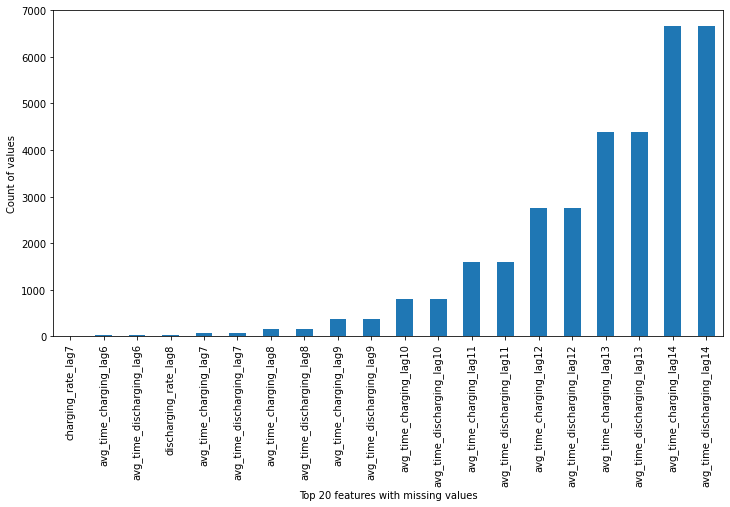

In [18]:
x = naColumns.sort_values().tail(20)

# Plot the count of missing NA values by features
x.plot.bar(figsize=(12,6))
plt.ylabel('Count of values')
plt.xlabel('Top 20 features with missing values')

In [19]:
# Fill the missing NAs for rows now
def filling(df):
    for i in df:
        if df[i].dtypes == object:
            # The non-numerical ones to be replaced by the most common occurences
            fill = df[i].mode().iat[0]
            df.loc[:,i] = df[i].replace(np.nan,fill)
        else:
            # The numeric ones will be replaces by median values for the fature
            the_mean = df[i].median(skipna=True)
            df.loc[:,i] = df[i].replace(np.nan,the_mean)

filling(df)

In [20]:
# Check - should show no more NAs
df.isnull().values.sum()

0

In [21]:
# Dropping the features which are of object type (dates) but have no use in the feature selection or modeling
del df['LastRecord']
del df['Date Deployed']

### Part E: Exploratory Data Analysis

In statistics, exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics, often with visual methods.

In [22]:
# Checking for feature type
types = dabl.detect_types(df)
print(types)

                             continuous  dirty_float  ...  free_string  useless
fail_7                            False        False  ...        False    False
deviceid                           True        False  ...        False    False
avg_time_charging_lag1             True        False  ...        False    False
avg_time_charging_lag2             True        False  ...        False    False
avg_time_charging_lag3             True        False  ...        False    False
avg_time_charging_lag7             True        False  ...        False    False
charging_rate_lag3                 True        False  ...        False    False
charging_rate_lag7                 True        False  ...        False    False
avg_time_discharging_lag1          True        False  ...        False    False
avg_time_discharging_lag2          True        False  ...        False    False
avg_time_discharging_lag3          True        False  ...        False    False
avg_time_discharging_lag7          True 

Target looks like classification
Showing only top 10 of 51 continuous features
Linear Discriminant Analysis training set score: 0.501


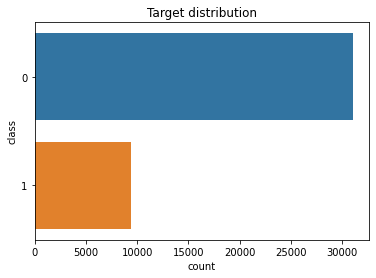

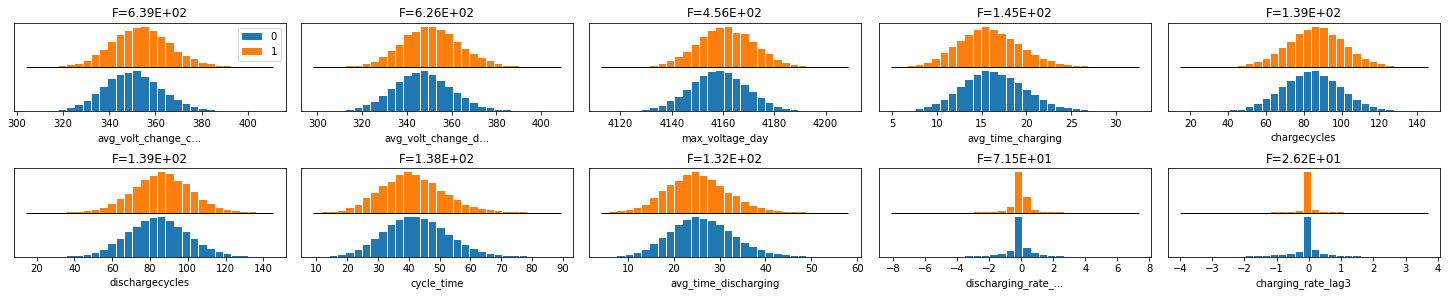

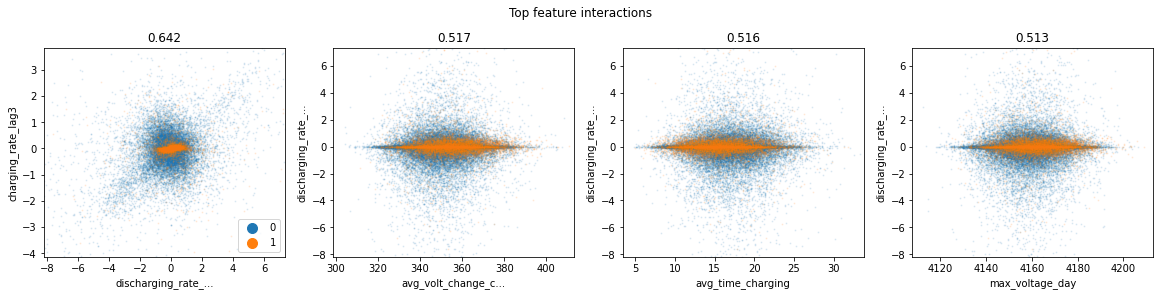

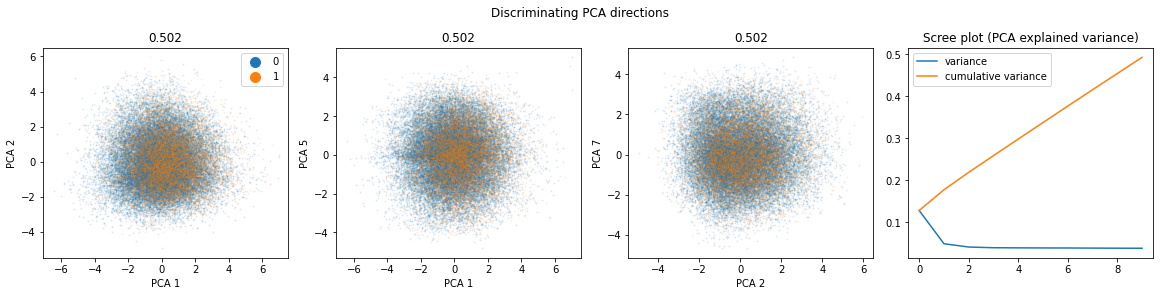

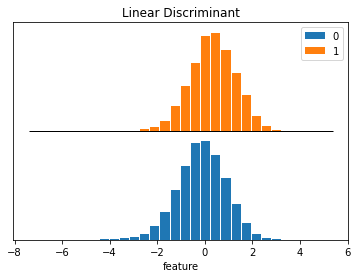

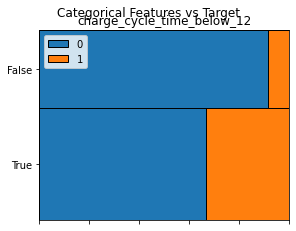

In [23]:
# What do we have for our y variable - 'fail_7'
# Dabl is an intuitive package that tells us if the task is a classification or regression
dabl.plot(df, target_col="fail_7")

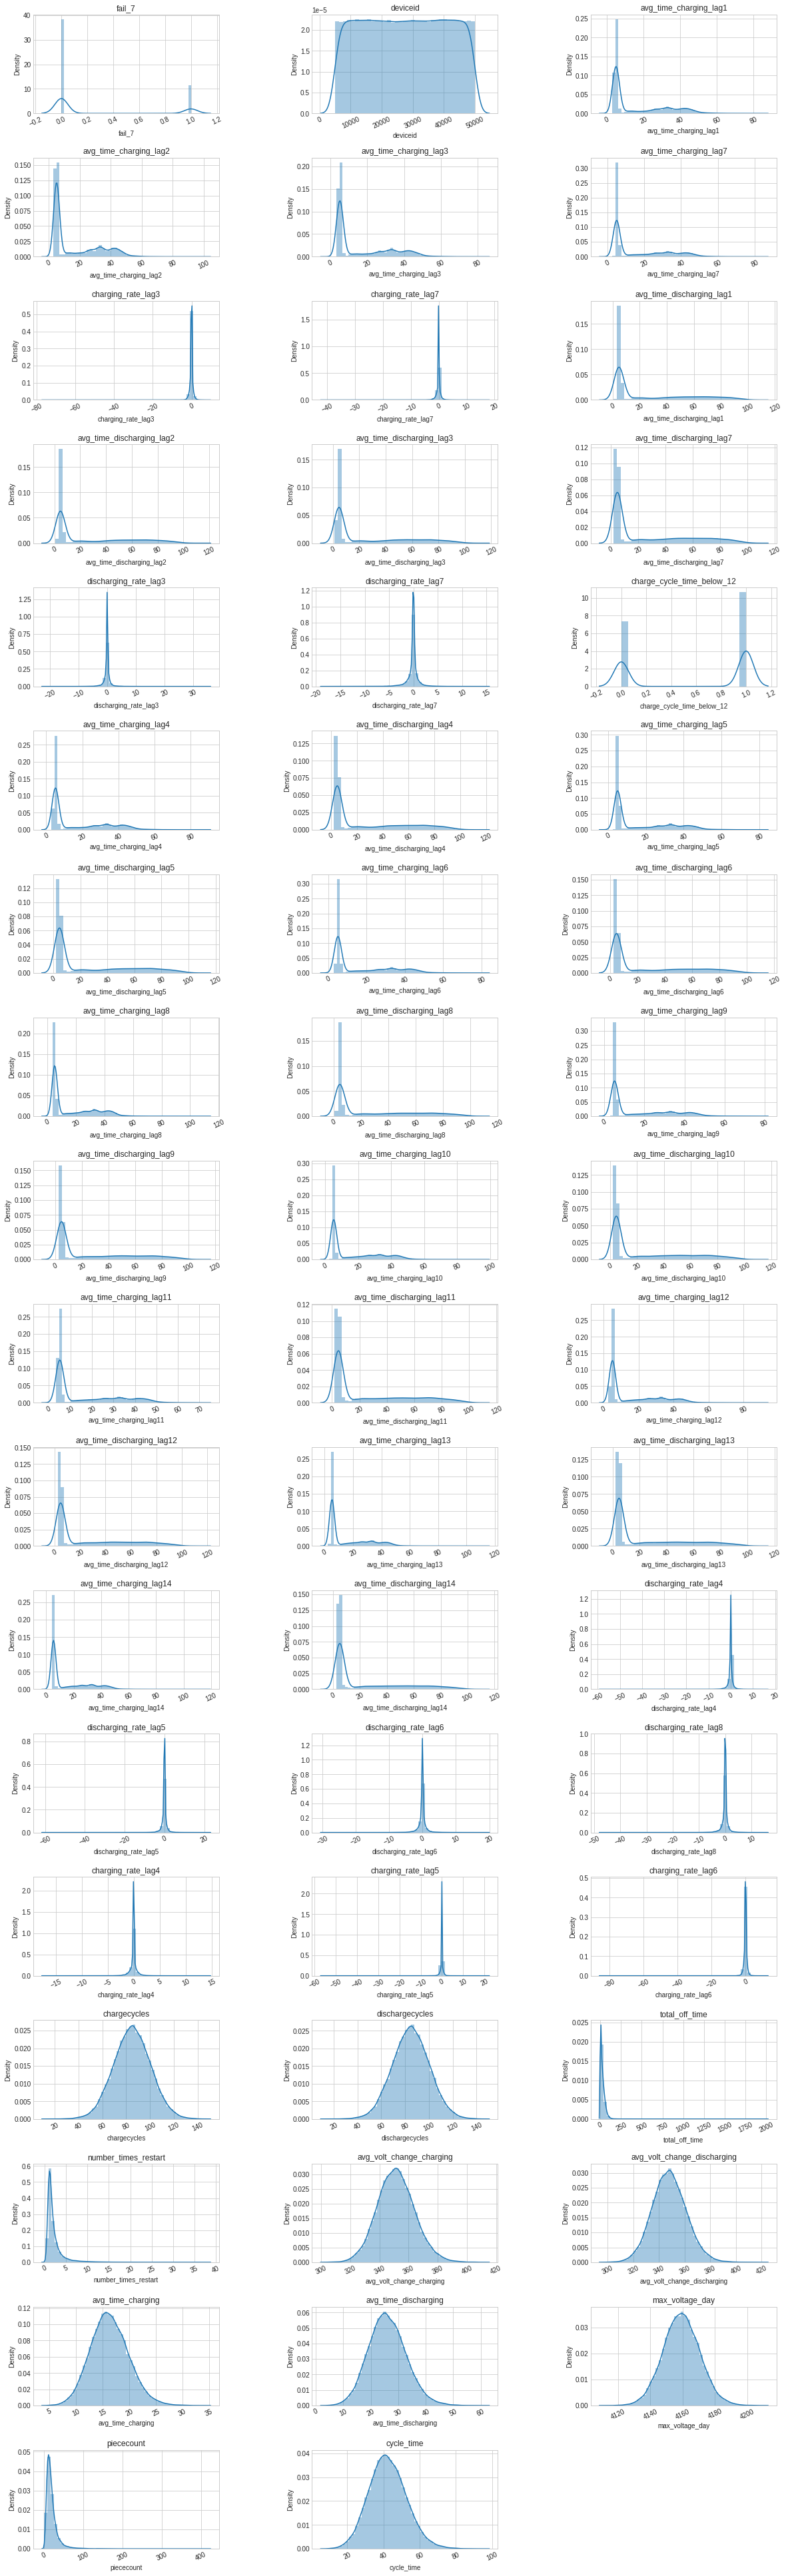

In [24]:
# Plotting the distribution of each feature
def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)
    
plot_distribution(df, cols=3, width=20, height=70, hspace=0.45, wspace=0.5)

### Part F: Feature Extraction

Feature extraction involves reducing the number of resources required to describe a large set of data. When performing analysis of complex data one of the major problems stems from the number of variables involved. Analysis with a large number of variables generally requires a large amount of memory and computation power, also it may cause a classification algorithm to overfit to training samples and generalize poorly to new samples. Feature extraction is a general term for methods of constructing combinations of the variables to get around these problems while still describing the data with sufficient accuracy.

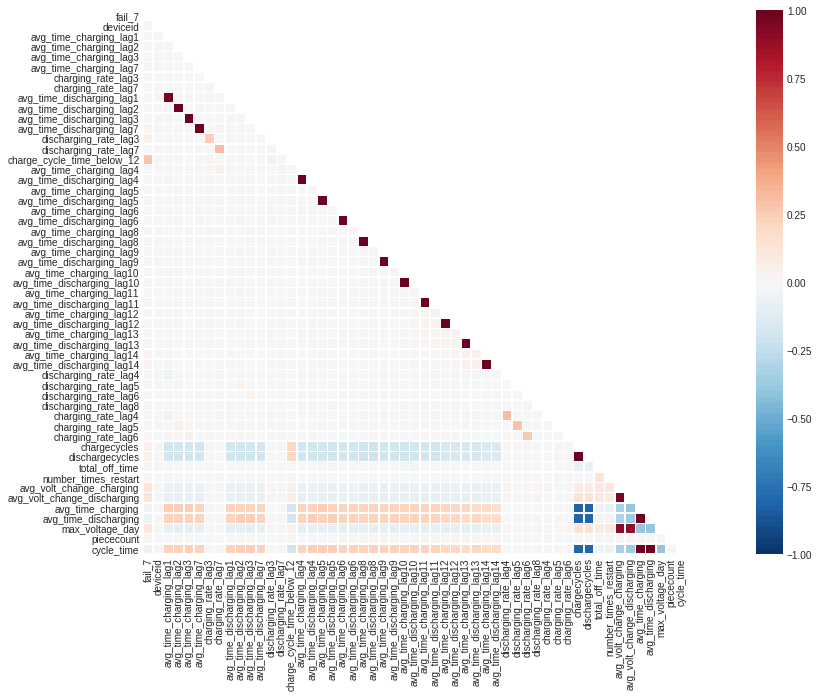

In [25]:
# Creating a correlation plot
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(25,10)) 

# Generate a mask for the upper triangle
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(), 
            vmin=-1, vmax=1, 
            square=True, 
            cmap=sns.color_palette("RdBu_r", 100), 
            mask=mask, 
            linewidths=.5);

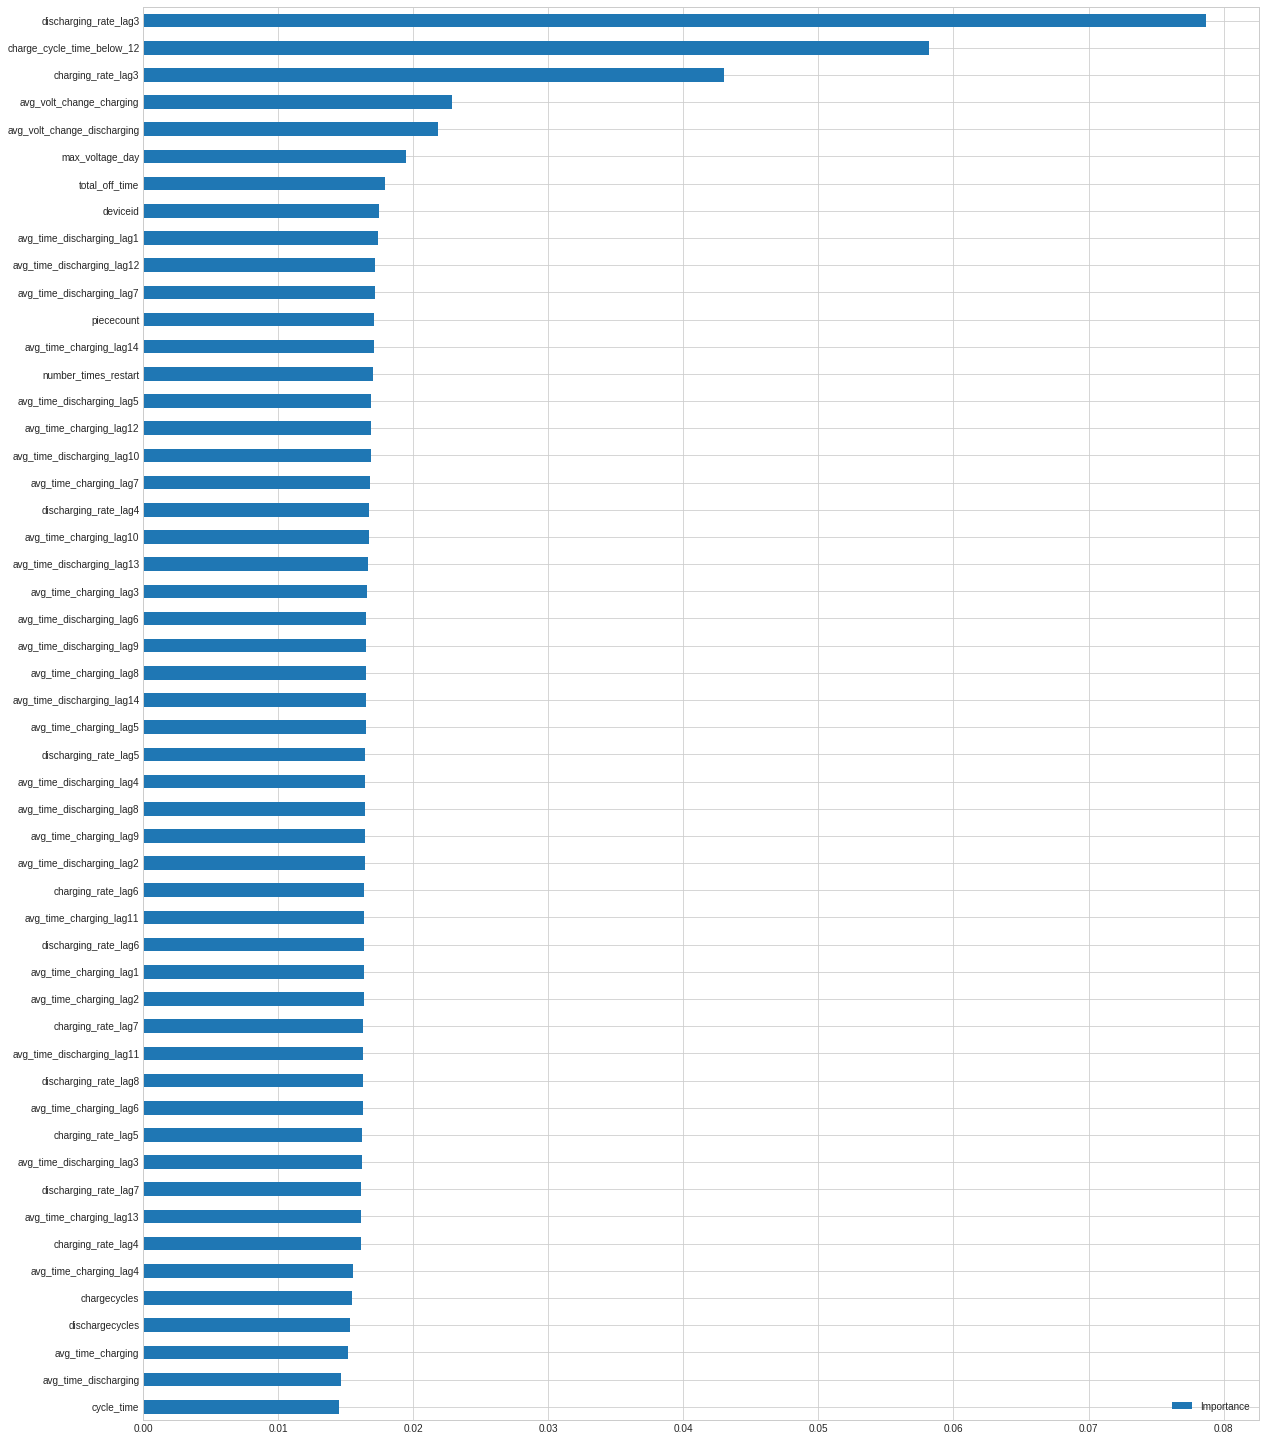

In [26]:
# Using Random Forest to gain an insight on Feature Importance
clf = RandomForestClassifier()
clf.fit(df.drop('fail_7', axis=1), df['fail_7'])

plt.style.use('seaborn-whitegrid')
importance = clf.feature_importances_
importance = pd.DataFrame(importance, index=df.drop('fail_7', axis=1).columns, columns=["Importance"])
importance.sort_values(by='Importance', ascending=True).plot(kind='barh', figsize=(20,len(importance)/2));

<BarContainer object of 52 artists>

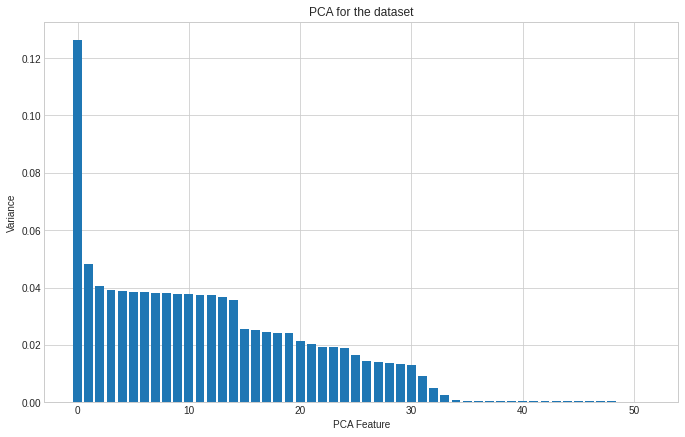

In [27]:
# Calculating PCA for dataset, and graphing the Variance for each feature
std_scale = preprocessing.StandardScaler().fit(df.drop('fail_7', axis=1))
X = std_scale.transform(df.drop('fail_7', axis=1))
pca1 = PCA(n_components=len(df.columns)-1)
fit1 = pca1.fit(X)

# Graphing the variance per feature
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(25,7)) 

plt.subplot(1, 2, 1)
plt.xlabel('PCA Feature')
plt.ylabel('Variance')
plt.title('PCA for the dataset')
plt.bar(range(0, fit1.explained_variance_ratio_.size), fit1.explained_variance_ratio_)

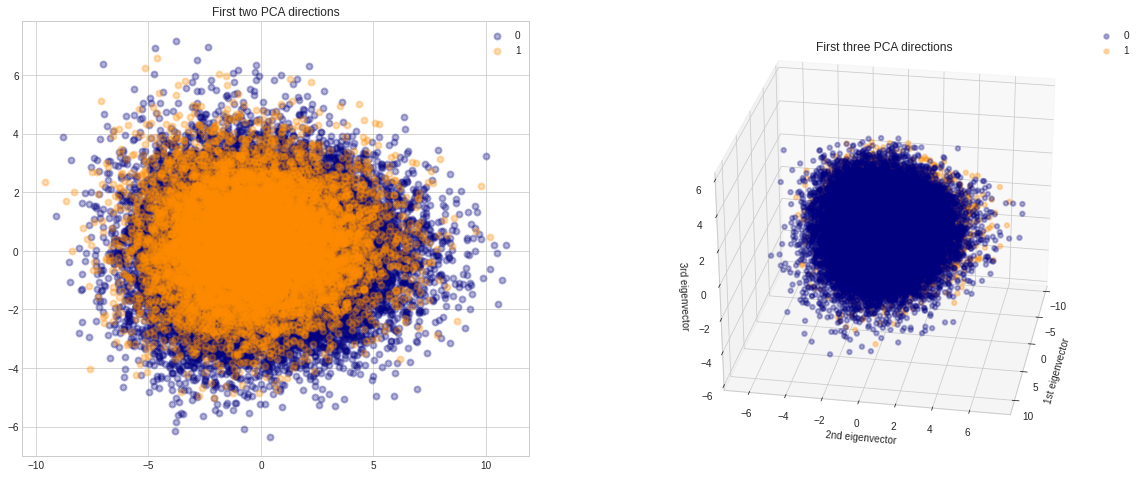

In [28]:
# PCA's components graphed in 2D and 3D

# Apply Scaling 
std_scale = preprocessing.StandardScaler().fit(df.drop('fail_7', axis=1))
X = std_scale.transform(df.drop('fail_7', axis=1))
y = df['fail_7']

# Formatting
target_names = [0,1]
colors = ['navy','darkorange']
lw = 2
alpha = 0.3

# 2 Components PCA
plt.style.use('seaborn-whitegrid')
plt.figure(2, figsize=(20, 8))

plt.subplot(1, 2, 1)
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], 
                color=color, 
                alpha=alpha, 
                lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('First two PCA directions');

# 3 Components PCA
ax = plt.subplot(1, 2, 2, projection='3d')

pca = PCA(n_components=3)
X_reduced = pca.fit(X).transform(X)
for color, i, target_name in zip(colors, [0, 1], target_names):
    ax.scatter(X_reduced[y == i, 0], X_reduced[y == i, 1], X_reduced[y == i, 2], 
               color=color,
               alpha=alpha,
               lw=lw, 
               label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")
ax.set_zlabel("3rd eigenvector")

# Rotate the axes
ax.view_init(30, 10)

## CASE I - Modeling with all the features

### Part G: Machine Learning - Model Preparation

In [29]:
# Split a dataset into train and validation sets
# NOTE: We are not calling it test set because that is separately shared for prediction
X = df.drop ('fail_7', axis=1)
y = df['fail_7']

# Split into train and validation sets
# We are calling it test here but that's just for nomenclature purpose
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [30]:
# Records - rows and columns for train and test after the split
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(36450, 52) (36450,)
(4050, 52) (4050,)


In [31]:
# Setting a random seed will guarantee we get the same results every time we run our training and testing.
random.seed(1)

In [32]:
# calculate the FPR and TPR for all thresholds of the classification
def plot_roc_curve(y_test, preds):
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [33]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, X_test, cv):
    # One Pass
    model = algo.fit(X_train, y_train)
    test_pred = model.predict(X_test)
    if (isinstance(algo, (LogisticRegression, 
                          KNeighborsClassifier, 
                          GaussianNB, 
                          DecisionTreeClassifier, 
                          RandomForestClassifier,
                          GradientBoostingClassifier,
                          XGBClassifier))):
        probs = model.predict_proba(X_test)[:,1]
    else:
        probs = "Not Available"
    acc = round(model.score(X_test, y_test) * 100, 2) 
    # CV 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    return train_pred, test_pred, acc, acc_cv, probs

In [34]:
# Logistic Regression - Random Search for Hyperparameters

# Utility function to report best scores
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            
# Specify parameters and distributions to sample from
param_dist = {'penalty': ['l2', 'l1'], 
                         'class_weight': [None, 'balanced'],
                         'C': np.logspace(-20, 20, 10000), 
                         'intercept_scaling': np.logspace(-20, 20, 10000)}

# Run Randomized Search
n_iter_search = 10
lrc = LogisticRegression()
random_search = RandomizedSearchCV(lrc, 
                                   n_jobs=-1, 
                                   param_distributions=param_dist, 
                                   n_iter=n_iter_search)

start = time.time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 19.12 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.768 (std: 0.000)
Parameters: {'penalty': 'l2', 'intercept_scaling': 1.826106711393907e-05, 'class_weight': None, 'C': 3.847321822197377e-09}

Model with rank: 2
Mean validation score: 0.768 (std: 0.000)
Parameters: {'penalty': 'l2', 'intercept_scaling': 6.315097178715411e-17, 'class_weight': None, 'C': 0.015624976827451342}

Model with rank: 3
Mean validation score: 0.768 (std: 0.000)
Parameters: {'penalty': 'l2', 'intercept_scaling': 35.168562369108535, 'class_weight': None, 'C': 10447247902.46589}

Model with rank: 3
Mean validation score: 0.768 (std: 0.000)
Parameters: {'penalty': 'l2', 'intercept_scaling': 57.30279657787807, 'class_weight': None, 'C': 1847679.594984369}

Model with rank: 5
Mean validation score: 0.584 (std: 0.005)
Parameters: {'penalty': 'l2', 'intercept_scaling': 80000059321.79088, 'class_weight': 'balanced', 'C': 2349292508.0258145}



### Part H: Machine Learning - Model Execution

In [35]:
# Logistic Regression
start_time = time.time()
train_pred_log, test_pred_log, acc_log, acc_cv_log, probs_log = fit_ml_algo(LogisticRegression(n_jobs = -1), 
                                                                 X_train, 
                                                                 y_train, 
                                                                 X_test, 
                                                                 10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 76.81
Accuracy CV 10-Fold: 76.77
Running Time: 0:00:10.780233


In [36]:
# Print the confusion matrix
print(metrics.classification_report(y_train, train_pred_log))
print(metrics.classification_report(y_test, test_pred_log))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87     27985
           1       0.48      0.00      0.01      8465

    accuracy                           0.77     36450
   macro avg       0.63      0.50      0.44     36450
weighted avg       0.70      0.77      0.67     36450

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      3114
           1       0.20      0.00      0.00       936

    accuracy                           0.77      4050
   macro avg       0.48      0.50      0.44      4050
weighted avg       0.64      0.77      0.67      4050



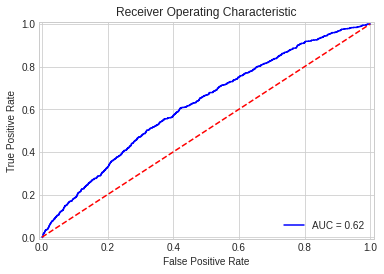

In [37]:
plot_roc_curve(y_test, probs_log)

In [38]:
# K-Nearest Neighbors (KNN)
start_time = time.time()
train_pred_knn, test_pred_knn, acc_knn, acc_cv_knn, probs_knn = fit_ml_algo(KNeighborsClassifier(n_neighbors = 3,
                                                                                                 n_jobs = -1), 
                                                                                                 X_train, 
                                                                                                 y_train, 
                                                                                                 X_test, 
                                                                                                 10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 69.7
Accuracy CV 10-Fold: 69.89
Running Time: 0:00:42.658303


In [39]:
# Print the confusion matrix
print(metrics.classification_report(y_train, train_pred_knn))
print(metrics.classification_report(y_test, test_pred_knn))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82     27985
           1       0.23      0.13      0.17      8465

    accuracy                           0.70     36450
   macro avg       0.50      0.50      0.49     36450
weighted avg       0.64      0.70      0.67     36450

              precision    recall  f1-score   support

           0       0.77      0.87      0.82      3114
           1       0.22      0.12      0.16       936

    accuracy                           0.70      4050
   macro avg       0.49      0.50      0.49      4050
weighted avg       0.64      0.70      0.66      4050



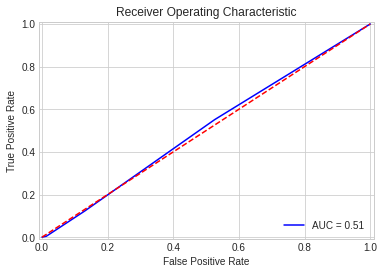

In [40]:
plot_roc_curve(y_test, probs_knn)

In [41]:
# Gaussian Naive Bayes
start_time = time.time()
train_pred_gaussian, test_pred_gaussian, acc_gaussian, acc_cv_gaussian, probs_gau = fit_ml_algo(GaussianNB(), 
                                                                                     X_train, 
                                                                                     y_train, 
                                                                                     X_test, 
                                                                                     10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 62.17
Accuracy CV 10-Fold: 61.78
Running Time: 0:00:01.825686


In [42]:
# Print the confusion matrix
print(metrics.classification_report(y_train, train_pred_gaussian))
print(metrics.classification_report(y_test, test_pred_gaussian))

              precision    recall  f1-score   support

           0       0.85      0.61      0.71     27985
           1       0.33      0.63      0.43      8465

    accuracy                           0.62     36450
   macro avg       0.59      0.62      0.57     36450
weighted avg       0.73      0.62      0.65     36450

              precision    recall  f1-score   support

           0       0.86      0.61      0.71      3114
           1       0.34      0.65      0.44       936

    accuracy                           0.62      4050
   macro avg       0.60      0.63      0.58      4050
weighted avg       0.74      0.62      0.65      4050



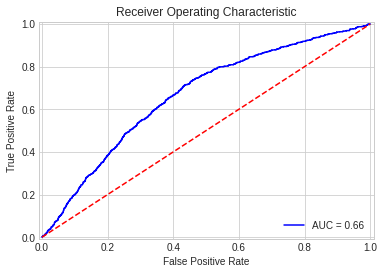

In [43]:
plot_roc_curve(y_test, probs_gau)

In [44]:
# Linear Support Vector Classification (SVC)
start_time = time.time()
train_pred_svc, test_pred_svc, acc_linear_svc, acc_cv_linear_svc, _ = fit_ml_algo(LinearSVC(),
                                                                                           X_train, 
                                                                                           y_train,
                                                                                           X_test, 
                                                                                           10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

Accuracy: 76.89
Accuracy CV 10-Fold: 59.34
Running Time: 0:02:23.309040


In [45]:
# Print the confusion matrix
print(metrics.classification_report(y_train, train_pred_svc))
print(metrics.classification_report(y_test, test_pred_svc))

              precision    recall  f1-score   support

           0       0.77      0.67      0.72     27985
           1       0.24      0.34      0.28      8465

    accuracy                           0.59     36450
   macro avg       0.50      0.50      0.50     36450
weighted avg       0.65      0.59      0.62     36450

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      3114
           1       0.00      0.00      0.00       936

    accuracy                           0.77      4050
   macro avg       0.38      0.50      0.43      4050
weighted avg       0.59      0.77      0.67      4050



In [46]:
# Stochastic Gradient Descent
start_time = time.time()
train_pred_sgd, test_pred_sgd, acc_sgd, acc_cv_sgd, _ = fit_ml_algo(SGDClassifier(n_jobs = -1), 
                                                                 X_train, 
                                                                 y_train, 
                                                                 X_test, 
                                                                 10)
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 24.27
Accuracy CV 10-Fold: 71.38
Running Time: 0:00:31.158852


In [47]:
# Print the confusion matrix
print(metrics.classification_report(y_train, train_pred_sgd))
print(metrics.classification_report(y_test, test_pred_sgd))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83     27985
           1       0.24      0.11      0.15      8465

    accuracy                           0.71     36450
   macro avg       0.50      0.50      0.49     36450
weighted avg       0.65      0.71      0.67     36450

              precision    recall  f1-score   support

           0       0.93      0.02      0.03      3114
           1       0.23      1.00      0.38       936

    accuracy                           0.24      4050
   macro avg       0.58      0.51      0.21      4050
weighted avg       0.77      0.24      0.11      4050



In [48]:
# Decision Tree Classifier
start_time = time.time()
train_pred_dt, test_pred_dt, acc_dt, acc_cv_dt, probs_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                             X_train, 
                                                             y_train, 
                                                             X_test, 
                                                             10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 71.68
Accuracy CV 10-Fold: 71.52
Running Time: 0:00:33.219994


In [49]:
# Print the confusion matrix
print(metrics.classification_report(y_train, train_pred_dt))
print(metrics.classification_report(y_test, test_pred_dt))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81     27985
           1       0.39      0.41      0.40      8465

    accuracy                           0.72     36450
   macro avg       0.61      0.61      0.61     36450
weighted avg       0.72      0.72      0.72     36450

              precision    recall  f1-score   support

           0       0.82      0.81      0.81      3114
           1       0.39      0.42      0.41       936

    accuracy                           0.72      4050
   macro avg       0.61      0.61      0.61      4050
weighted avg       0.72      0.72      0.72      4050



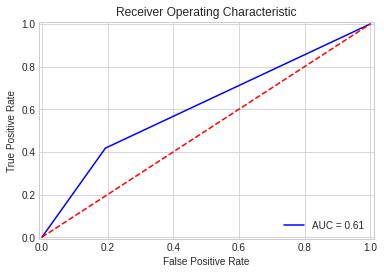

In [50]:
plot_roc_curve(y_test, probs_dt)

In [51]:
# Random Forest Classifier - Random Search for Hyperparameters

# Utility function to report best scores
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            
# Specify parameters and distributions to sample from
param_dist = {"max_depth": [10, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 20),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Run Randomized Search
n_iter_search = 10
rfc = RandomForestClassifier(n_estimators=10)
random_search = RandomizedSearchCV(rfc, 
                                   n_jobs = -1, 
                                   param_distributions=param_dist, 
                                   n_iter=n_iter_search)

start = time.time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 97.72 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.794 (std: 0.002)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 10, 'min_samples_leaf': 8, 'min_samples_split': 11}

Model with rank: 2
Mean validation score: 0.791 (std: 0.007)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 9, 'min_samples_leaf': 5, 'min_samples_split': 4}

Model with rank: 3
Mean validation score: 0.788 (std: 0.006)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 10, 'max_features': 9, 'min_samples_leaf': 4, 'min_samples_split': 8}

Model with rank: 4
Mean validation score: 0.788 (std: 0.003)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 5, 'min_samples_split': 15}

Model with rank: 5
Mean validation score: 0.785 (std: 0.002)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max

In [52]:
# Random Forest Classifier
start_time = time.time()
rfc = RandomForestClassifier(n_estimators=10, 
                             min_samples_leaf=2,
                             min_samples_split=17, 
                             criterion='gini', 
                             max_features=8)
train_pred_rf, test_pred_rf, acc_rf, acc_cv_rf, probs_rf = fit_ml_algo(rfc, 
                                                             X_train, 
                                                             y_train, 
                                                             X_test, 
                                                             10)
rf_time = (time.time() - start_time)
print("Accuracy: %s" % acc_rf)
print("Accuracy CV 10-Fold: %s" % acc_cv_rf)
print("Running Time: %s" % datetime.timedelta(seconds=rf_time))

Accuracy: 78.96
Accuracy CV 10-Fold: 78.6
Running Time: 0:00:29.471061


In [53]:
# Print the confusion matrix
print(metrics.classification_report(y_train, train_pred_rf))
print(metrics.classification_report(y_test, test_pred_rf))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87     27985
           1       0.59      0.26      0.36      8465

    accuracy                           0.79     36450
   macro avg       0.70      0.60      0.61     36450
weighted avg       0.76      0.79      0.75     36450

              precision    recall  f1-score   support

           0       0.81      0.95      0.87      3114
           1       0.61      0.25      0.36       936

    accuracy                           0.79      4050
   macro avg       0.71      0.60      0.62      4050
weighted avg       0.76      0.79      0.75      4050



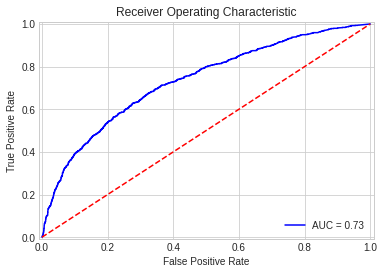

In [54]:
plot_roc_curve(y_test, probs_rf)

In [55]:
# Gradient Boosting Classifier
start_time = time.time()
train_pred_gbc, test_pred_gbc, acc_gbc, acc_cv_gbc, probs_gbc = fit_ml_algo(GradientBoostingClassifier(), 
                                                                 X_train, 
                                                                 y_train, 
                                                                 X_test, 
                                                                 10)
gbc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbc)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbc)
print("Running Time: %s" % datetime.timedelta(seconds=gbc_time))

Accuracy: 81.09
Accuracy CV 10-Fold: 81.34
Running Time: 0:06:39.830707


In [56]:
# Print the confusion matrix
print(metrics.classification_report(y_train, train_pred_gbc))
print(metrics.classification_report(y_test, test_pred_gbc))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89     27985
           1       0.68      0.37      0.48      8465

    accuracy                           0.81     36450
   macro avg       0.76      0.66      0.68     36450
weighted avg       0.80      0.81      0.79     36450

              precision    recall  f1-score   support

           0       0.83      0.95      0.88      3114
           1       0.67      0.36      0.47       936

    accuracy                           0.81      4050
   macro avg       0.75      0.65      0.68      4050
weighted avg       0.79      0.81      0.79      4050



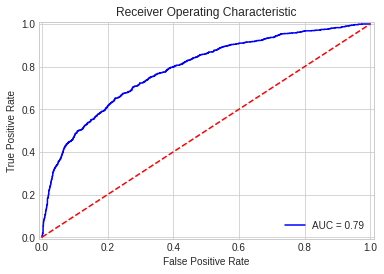

In [57]:
plot_roc_curve(y_test, probs_gbc)

In [58]:
# XGBoost Classifier
start_time = time.time()
train_pred_xgb, test_pred_xgb, acc_xgb, acc_cv_xgb, probs_xgb = fit_ml_algo(XGBClassifier(), 
                                                                 X_train, 
                                                                 y_train, 
                                                                 X_test, 
                                                                 10)
xgb_time = (time.time() - start_time)
print("Accuracy: %s" % acc_xgb)
print("Accuracy CV 10-Fold: %s" % acc_cv_xgb)
print("Running Time: %s" % datetime.timedelta(seconds=xgb_time))

Accuracy: 81.04
Accuracy CV 10-Fold: 81.42
Running Time: 0:01:12.089744


In [59]:
# Print the confusion matrix
print(metrics.classification_report(y_train, train_pred_xgb))
print(metrics.classification_report(y_test, test_pred_xgb))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89     27985
           1       0.68      0.37      0.48      8465

    accuracy                           0.81     36450
   macro avg       0.76      0.66      0.68     36450
weighted avg       0.80      0.81      0.79     36450

              precision    recall  f1-score   support

           0       0.83      0.95      0.88      3114
           1       0.67      0.36      0.47       936

    accuracy                           0.81      4050
   macro avg       0.75      0.65      0.68      4050
weighted avg       0.79      0.81      0.79      4050



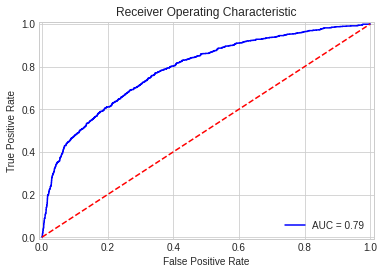

In [60]:
plot_roc_curve(y_test, probs_xgb)

### Part I: Machine Learning - Model Evaluation

In [61]:
# Compare all the models with their respective accuracy scores
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Descent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Classifier',
              'XGBoost Classifier'],
    'Accuracy Score': [
        acc_knn, 
        acc_log, 
        acc_rf, 
        acc_gaussian, 
        acc_sgd, 
        acc_linear_svc, 
        acc_dt,
        acc_gbc,
        acc_xgb
    ]})
models.sort_values(by='Accuracy Score', ascending=False)

,Model,Accuracy Score
7,Gradient Boosting Classifier,81.09
8,XGBoost Classifier,81.04
2,Random Forest,78.96
5,Linear SVC,76.89
1,Logistic Regression,76.81
6,Decision Tree,71.68
0,KNN,69.70
3,Naive Bayes,62.17
4,Stochastic Gradient Descent,24.27


In [62]:
# Compare all the models with their respective accuracy scores using 10-CV
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Descent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Classifier',
              'XGBoost Classifier'],
    'Accuracy Score (10-CV)': [
        acc_cv_knn, 
        acc_cv_log,     
        acc_cv_rf, 
        acc_cv_gaussian, 
        acc_cv_sgd, 
        acc_cv_linear_svc, 
        acc_cv_dt,
        acc_cv_gbc,
        acc_cv_xgb
    ]})
models.sort_values(by='Accuracy Score (10-CV)', ascending=False)

,Model,Accuracy Score (10-CV)
8,XGBoost Classifier,81.42
7,Gradient Boosting Classifier,81.34
2,Random Forest,78.60
1,Logistic Regression,76.77
6,Decision Tree,71.52
4,Stochastic Gradient Descent,71.38
0,KNN,69.89
3,Naive Bayes,61.78
5,Linear SVC,59.34


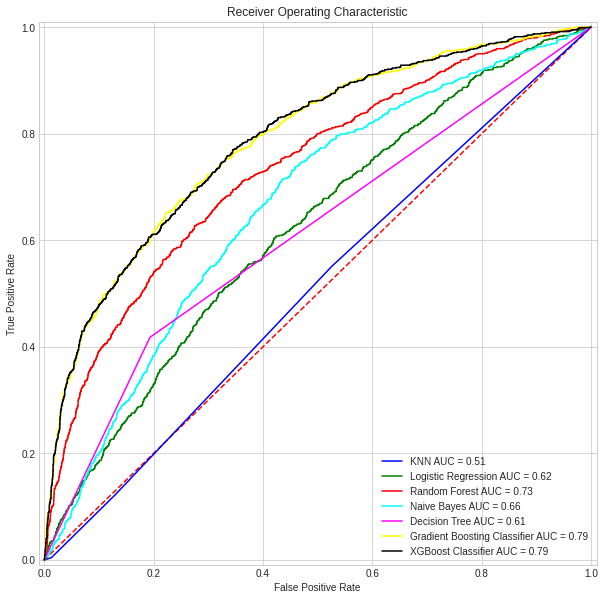

In [63]:
# Plot all the models to compare their ROC
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(10,10)) 

models = [
    'KNN', 
    'Logistic Regression', 
    'Random Forest', 
    'Naive Bayes', 
    'Decision Tree', 
    'Gradient Boosting Classifier',
    'XGBoost Classifier'
]

probs = [
    probs_knn,
    probs_log,
    probs_rf,
    probs_gau,
    probs_dt,
    probs_gbc,
    probs_xgb
]

colors = [
    'blue',
    'green',
    'red',
    'cyan',
    'magenta',
    'yellow',
    'black'
]
    
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

def plot_roc_curves(y_test, prob, model):
    fpr, tpr, threshold = metrics.roc_curve(y_test, prob)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, 'b', label = model + ' AUC = %0.2f' % roc_auc, color=colors[i])
    plt.legend(loc = 'lower right')
    
for i, model in list(enumerate(models)):
    plot_roc_curves(y_test, probs[i], models[i])
    
plt.show()

### Part J: Preparing the test set for prediction

In [64]:
# We repeat the data-processing, data wrangling steps here again and there is a reason
# why we chose to keep functions for those tasks as it can be replicated easily for test set

# Records - rows and columns
df_test.shape

# We see that there is one column less than our training dataset above as we have to predict 'fail_7' category

(4500, 54)

In [65]:
# Check for total null values
df_test.isnull().values.sum()

3980

In [66]:
# Null or NAs by column
naColumns = df_test.isnull().sum()

# Sort for top 20 with NAs
naColumns.sort_values()

deviceid                         0
discharging_rate_lag5            0
discharging_rate_lag6            0
charging_rate_lag4               0
charging_rate_lag5               0
charging_rate_lag6               0
chargecycles                     0
dischargecycles                  0
discharging_rate_lag4            0
total_off_time                   0
avg_volt_change_charging         0
avg_volt_change_discharging      0
avg_time_charging                0
avg_time_discharging             0
max_voltage_day                  0
piececount                       0
cycle_time                       0
number_times_restart             0
LastRecord                       0
Date Deployed                    0
avg_time_discharging_lag4        0
discharging_rate_lag3            0
avg_time_discharging_lag3        0
avg_time_charging_lag4           0
avg_time_discharging_lag1        0
avg_time_discharging_lag2        0
avg_time_charging_lag3           0
avg_time_charging_lag2           0
avg_time_charging_la

Text(0.5, 0, 'Top 20 variables with missing values')

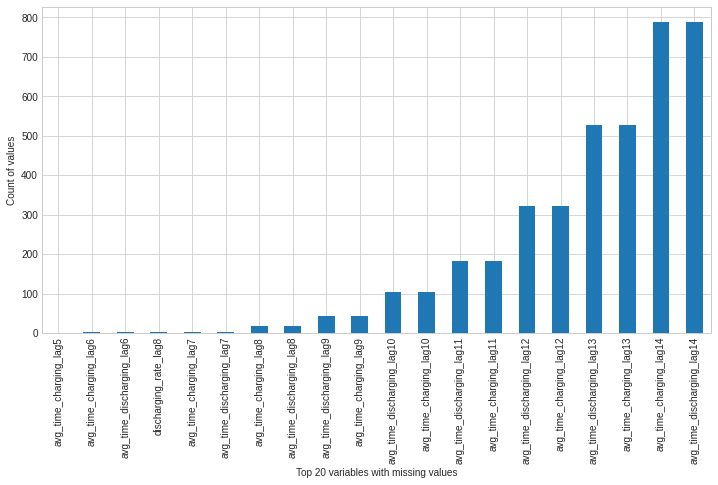

In [67]:
x = naColumns.sort_values().tail(20)

# Plot the count of missing NA values by features
x.plot.bar(figsize=(12,6))
plt.ylabel('Count of values')
plt.xlabel('Top 20 variables with missing values')

In [68]:
# Fill the missing NAs for rows now
filling(df_test)

In [69]:
# Should show no more NAs
df_test.isnull().values.sum()

0

In [70]:
# Dropping the features which are of object type but have no use in the feature selection or modeling
del df_test['LastRecord']
del df_test['Date Deployed']

### Part K: Predicting the 'fail_7' for test.csv

In [71]:
# Dropping the unique identifier from the train set and will be used later to recognise the categorical predictions
train = df.drop(['fail_7'], axis=1)

In [72]:
# To train on 100% of training data
train_data = train
target = y

In [73]:
train_data.head()

,deviceid,avg_time_charging_lag1,avg_time_charging_lag2,avg_time_charging_lag3,avg_time_charging_lag7,charging_rate_lag3,charging_rate_lag7,avg_time_discharging_lag1,avg_time_discharging_lag2,avg_time_discharging_lag3,avg_time_discharging_lag7,discharging_rate_lag3,discharging_rate_lag7,charge_cycle_time_below_12,avg_time_charging_lag4,avg_time_discharging_lag4,avg_time_charging_lag5,avg_time_discharging_lag5,avg_time_charging_lag6,avg_time_discharging_lag6,avg_time_charging_lag8,avg_time_discharging_lag8,avg_time_charging_lag9,avg_time_discharging_lag9,avg_time_charging_lag10,avg_time_discharging_lag10,avg_time_charging_lag11,avg_time_discharging_lag11,avg_time_charging_lag12,avg_time_discharging_lag12,avg_time_charging_lag13,avg_time_discharging_lag13,avg_time_charging_lag14,avg_time_discharging_lag14,discharging_rate_lag4,discharging_rate_lag5,discharging_rate_lag6,discharging_rate_lag8,charging_rate_lag4,charging_rate_lag5,charging_rate_lag6,chargecycles,dischargecycles,total_off_time,number_times_restart,avg_volt_change_charging,avg_volt_change_discharging,avg_time_charging,avg_time_discharging,max_voltage_day,piececount,cycle_time
0,28647,5.12,41.11,6.56,25.39,0.086667,-0.006667,4.37,91.70,15.70,39.12,-1.163333,0.033333,False,4.99,5.85,24.35,31.02,43.42,79.33,5.78,5.92,5.77,5.93,5.79,5.94,5.84,6.07,5.83,6.06,5.83,6.06,5.84,6.11,-0.360000,1.573333,0.816667,-0.173333,-0.070000,-1.603333,-0.166667,50.250000,49.750000,49.000000,2.375000,377.080000,367.428750,21.696250,39.005000,4174.875000,14.200000,60.701250
1,36175,36.60,5.16,6.23,6.96,0.136667,-1.296667,62.67,6.53,6.16,8.25,-0.066667,-2.653333,False,13.64,20.37,5.65,4.77,19.41,24.33,35.92,59.38,4.49,4.12,44.18,72.46,27.45,49.02,10.89,18.93,21.39,35.90,5.84,6.11,-4.593333,0.450000,-3.063333,-0.103333,0.216667,0.000000,-1.010000,56.285714,56.000000,36.857143,1.000000,350.517857,350.309286,19.883571,32.213571,4161.000000,19.777778,52.097143
2,16107,5.51,5.04,4.52,5.96,-0.460000,-0.083333,5.13,5.65,4.14,14.02,-2.643333,0.686667,False,25.01,40.69,6.03,6.06,5.72,5.73,22.46,31.82,33.92,58.87,45.87,76.36,5.78,6.23,5.13,4.37,4.73,3.50,26.79,41.29,-0.050000,0.240000,0.000000,0.216667,-0.026667,0.000000,-0.013333,80.380952,80.333333,2.333333,4.095238,346.113333,343.409524,13.675238,20.471429,4152.238095,19.200000,34.146667
3,27362,4.66,39.85,35.76,40.69,0.076667,-0.006667,3.93,76.37,60.86,73.53,-0.166667,0.033333,False,4.71,3.74,4.74,3.73,24.01,52.99,5.09,5.32,4.45,4.22,22.14,30.51,4.39,4.15,4.71,3.82,13.27,18.62,4.97,4.16,0.013333,0.406667,-0.293333,-0.046667,-0.030000,0.460000,1.340000,91.736842,91.684211,10.789474,0.736842,356.184211,349.844737,16.306842,26.189474,4164.631579,23.625000,42.496316
4,19463,5.10,43.24,4.63,5.26,0.040000,-0.153333,4.69,71.44,3.80,6.29,0.066667,-1.030000,True,40.36,82.70,15.47,24.21,45.64,76.42,26.63,45.04,27.99,40.57,5.01,6.52,5.47,4.64,5.28,5.16,25.10,47.76,21.62,37.29,-0.353333,0.983333,-0.006667,-1.790000,0.016667,1.606667,0.013333,71.066667,70.733333,14.266667,1.133333,370.904000,367.730000,18.797333,30.812000,4169.800000,12.666667,49.609333


In [74]:
# Picking XGBoost Classifier because that was out best fit ML ago from results above
# However the results for Gradient Boosting Classifier was almost as good as XGBoost with only marginal difference.
# But, going by the rank, XGBoost Classifier returned the best accuracy of 81.42% with 10-cv.

# Declare parameters
params = {
    'objective':'binary:logistic',
    'max_depth': 4,
    'gamma': 0.5,
    'learning_rate': 0.01,
    }    


# Instantiate the classifier 
xgb_clf = XGBClassifier(**params)

**Often we are asked what is the difference between Gradient Boosting and XGBost?**

Basically, Gradient boosting is a technique. Both, the XGBoost classifier and sklearn's Gradient Boosting classifier are implementations of this technique in code. So they are implementing the same technique.

XGBoost is one of the fastest implementations of gradient boosted trees.
It does this by tackling one of the major inefficiencies of gradient boosted trees: considering the potential loss for all possible splits to create a new branch (especially if you consider the case where there are thousands of features, and therefore thousands of possible splits). XGBoost tackles this inefficiency by looking at the distribution of features across all data points in a leaf and using this information to reduce the search space of possible feature splits. In some cases they seem to not make any difference as we see here.

Although XGBoost implements a few regularization tricks, this speed up is by far the most useful feature of the library, allowing many hyperparameter settings to be investigated quickly. This is helpful because there are many, many hyperparameters to tune. Nearly all of them are designed to limit overfitting (no matter how simple your base models are, if you stick thousands of them together they will overfit).

In [75]:
scoring = 'accuracy'
score = cross_val_score(xgb_clf, train_data, target, cv=10, n_jobs=-1, scoring=scoring)

In [76]:
scoreP = round(np.mean(score)*100, 2)
print('Our XGBoosting Classifier score for entire training dataset is ' + str(scoreP) + '%')

Our XGBoosting Classifier score for entire training dataset is 81.21%


In [77]:
# Predict the class for test data on whether the 4500 new devices will fail in next 7 weeks or not
xgb_clf.fit(train_data, target)

prediction = xgb_clf.predict(df_test)

In [78]:
category_pred_fail_7_xgb = pd.DataFrame({
    'deviceid': df_test['deviceid'],
    'fail_7': prediction
})

In [79]:
category_pred_fail_7_xgb.head(10)

,deviceid,fail_7
0,42979,1
1,14911,0
2,48386,0
3,18822,0
4,49810,0
5,23495,0
6,30555,1
7,18316,0
8,17929,0
9,33374,0


In [80]:
# The result can be saved in csv with the following code:
# NOTE: If using Google Colab like here then the results will be saved locally here under '/contents'
category_pred_fail_7_xgb.to_csv('pb_challenge_prediction_xgb.csv', index=False)

## CASE II - Modeling with feature selection

### Part L: Identifying the optimal features

In [81]:
# Now Let's repeat the process with feature selection - which we have done earlier but we are putting it here again to maintain the flow

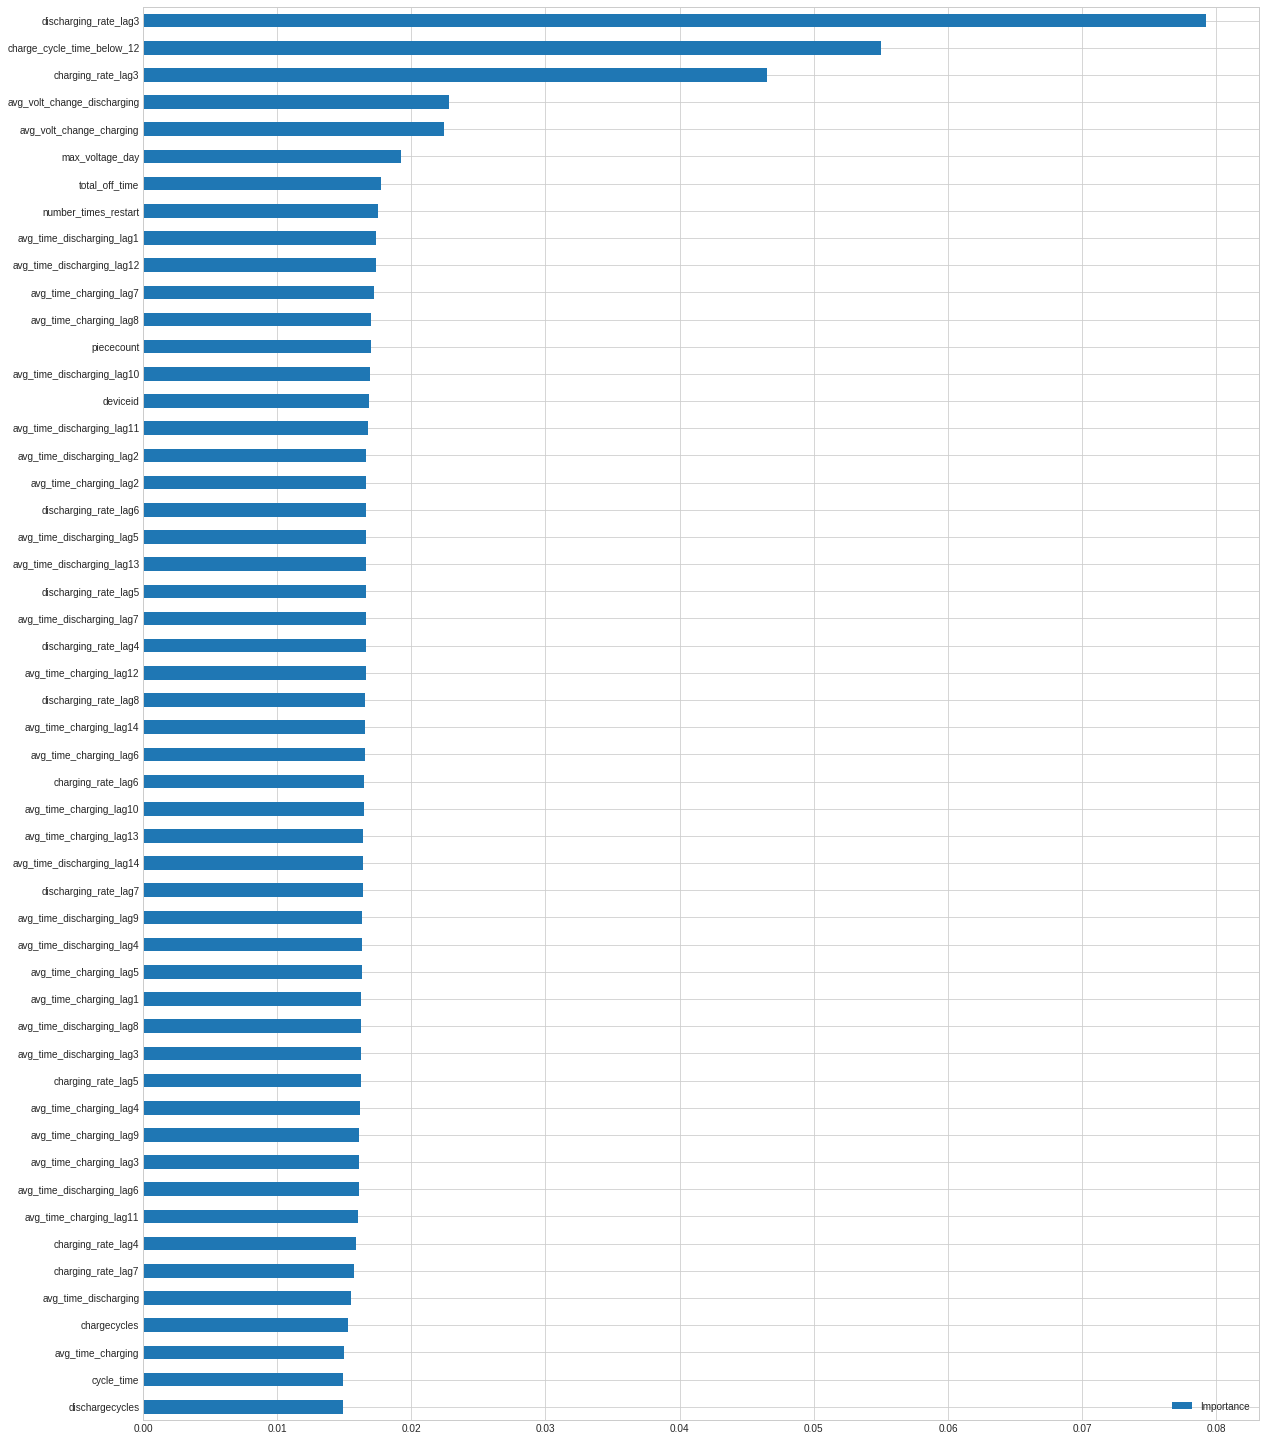

In [82]:
# Using Random Forest to gain an insight on Feature Importance
clf = RandomForestClassifier()
clf.fit(df.drop('fail_7', axis=1), df['fail_7'])

plt.style.use('seaborn-whitegrid')
importance = clf.feature_importances_
importance = pd.DataFrame(importance, index=df.drop('fail_7', axis=1).columns, columns=["Importance"])
importance.sort_values(by='Importance', ascending=True).plot(kind='barh', figsize=(20,len(importance)/2));

<BarContainer object of 52 artists>

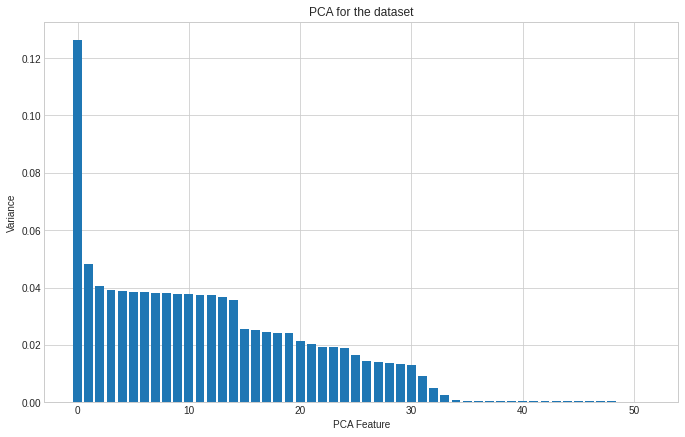

In [83]:
# Calculating PCA for dataset, and graphing the Variance for each feature
std_scale = preprocessing.StandardScaler().fit(df.drop('fail_7', axis=1))
X = std_scale.transform(df.drop('fail_7', axis=1))
pca1 = PCA(n_components=len(df.columns)-1)
fit1 = pca1.fit(X)

# Graphing the variance per feature
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(25,7)) 

plt.subplot(1, 2, 1)
plt.xlabel('PCA Feature')
plt.ylabel('Variance')
plt.title('PCA for the dataset')
plt.bar(range(0, fit1.explained_variance_ratio_.size), fit1.explained_variance_ratio_)

In [84]:
# We have run PCA to find the variables with maximum variance and found that close to 30 of the 54 features dictate most of the variation and plays a major role in classification.
# But we didn't use it. So for next steps, we will try to identify these top features and use them to run the same algos again.
# The variables are same as earlier but to distinguish I have add '_fs' suffix to highlight feature selection

In [85]:
# We don't have any features that need label encoding, but for classification exercise it is quite common, so I am leaving the procedure for reference:
# Label Encode all labels
'''
df = df.apply(LabelEncoder().fit_transform)
df.head(5)
'''

'\ndf = df.apply(LabelEncoder().fit_transform)\ndf.head(5)\n'

Feature Ranking For Non-Discretised: [17  1  1  1  1  3  7  6  1  9  8  1  4  1  2  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  5 13 18 15 12 11 16  1  1 14  1  1  1  1
  1  1 10  1]
Optimal number of features : 35


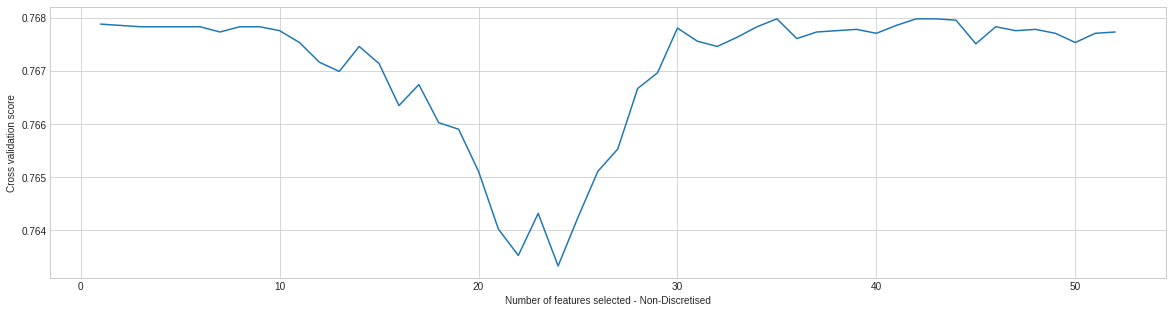

In [86]:
# Calculating RFE for non-discretised dataset, and graphing the importance for each feature

# Using RFECV method
# n_jobs = -1 means using all processors
selector = RFECV(LogisticRegression(), step=1, cv=5, n_jobs=-1)

selector = selector.fit(df.drop('fail_7', axis=1).values, df['fail_7'].values)
print("Feature Ranking For Non-Discretised: %s" % selector.ranking_)
print("Optimal number of features : %d" % selector.n_features_)

# Plot number of features VS. cross-validation scores
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20,5)) 
plt.xlabel("Number of features selected - Non-Discretised")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_);

# Feature space could be subsetted and inserting the 0th index back as it is our classification feature - 'fail_7'
df_rfecv = df[df.columns[np.insert(selector.support_, 0, True)]]

In [87]:
# Checking the name of columns in selection for the modeling
df_rfecv.columns

Index(['fail_7', 'avg_time_charging_lag1', 'avg_time_charging_lag2',
       'avg_time_charging_lag3', 'avg_time_charging_lag7',
       'avg_time_discharging_lag2', 'discharging_rate_lag3',
       'charge_cycle_time_below_12', 'avg_time_discharging_lag4',
       'avg_time_charging_lag5', 'avg_time_discharging_lag5',
       'avg_time_charging_lag6', 'avg_time_discharging_lag6',
       'avg_time_charging_lag8', 'avg_time_discharging_lag8',
       'avg_time_charging_lag9', 'avg_time_discharging_lag9',
       'avg_time_charging_lag10', 'avg_time_discharging_lag10',
       'avg_time_charging_lag11', 'avg_time_discharging_lag11',
       'avg_time_charging_lag12', 'avg_time_discharging_lag12',
       'avg_time_charging_lag13', 'avg_time_discharging_lag13',
       'avg_time_charging_lag14', 'avg_time_discharging_lag14', 'chargecycles',
       'dischargecycles', 'number_times_restart', 'avg_volt_change_charging',
       'avg_volt_change_discharging', 'avg_time_charging',
       'avg_time_dischar

### Part M: Machine Learning - Model Preparation_fs

In [88]:
# Split a dataset into train and validation sets
# NOTE: We are not calling it test set because that is separately shared for prediction
X = df_rfecv.drop ('fail_7', axis=1)
y = df_rfecv['fail_7']

# Split into train and validation sets
# We are calling it test here but that's just for nomenclature purpose
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [89]:
# Records - rows and columns for train and test after the split
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(36450, 35) (36450,)
(4050, 35) (4050,)


In [90]:
# Setting a random seed will guarantee we get the same results every time we run our training and testing.
random.seed(1)

In [91]:
# Reason why we chose to have functions for all our steps earlier for:
# 1. Imputing for missing values
# 2. For calcualting accuracy, FPR, TPR, etc.
# 3. For running ML_algos for different models

### Part M: Machine Learning - Model Execution_fs

In [92]:
# Logistic Regression - Random Search for Hyperparameters

# Utility function to report best scores
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            
# Specify parameters and distributions to sample from
param_dist = {'penalty': ['l2', 'l1'], 
                         'class_weight': [None, 'balanced'],
                         'C': np.logspace(-20, 20, 10000), 
                         'intercept_scaling': np.logspace(-20, 20, 10000)}

# Run Randomized Search
n_iter_search = 10
lrc = LogisticRegression()
random_search = RandomizedSearchCV(lrc, 
                                   n_jobs=-1, 
                                   param_distributions=param_dist, 
                                   n_iter=n_iter_search)

start = time.time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 8.07 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.768 (std: 0.000)
Parameters: {'penalty': 'l2', 'intercept_scaling': 5.602409341464951e-17, 'class_weight': None, 'C': 4.209809329579465e-18}

Model with rank: 1
Mean validation score: 0.768 (std: 0.000)
Parameters: {'penalty': 'l2', 'intercept_scaling': 4.328761281083062e-17, 'class_weight': None, 'C': 1.5143212677509946e-18}

Model with rank: 3
Mean validation score: 0.587 (std: 0.006)
Parameters: {'penalty': 'l2', 'intercept_scaling': 3.2572514428280255e-12, 'class_weight': 'balanced', 'C': 2.0418837039835687}

Model with rank: 4
Mean validation score: 0.583 (std: 0.005)
Parameters: {'penalty': 'l2', 'intercept_scaling': 3.9487500641135985e-16, 'class_weight': 'balanced', 'C': 2.753239454125703e+18}

Model with rank: 5
Mean validation score: nan (std: nan)
Parameters: {'penalty': 'l1', 'intercept_scaling': 0.08431262080028218, 'class_weight': 'balanced', 'C': 75.5418

In [93]:
# Logistic Regression
start_time = time.time()
train_pred_log_fs, test_pred_log_fs, acc_log_fs, acc_cv_log_fs, probs_log_fs = fit_ml_algo(LogisticRegression(n_jobs = -1), 
                                                                                           X_train, 
                                                                                           y_train,
                                                                                           X_test,
                                                                                           10)
log_time_fs = (time.time() - start_time)
print("Accuracy: %s" % acc_log_fs)
print("Accuracy CV 10-Fold: %s" % acc_cv_log_fs)
print("Running Time: %s" % datetime.timedelta(seconds=log_time_fs))

Accuracy: 76.81
Accuracy CV 10-Fold: 76.78
Running Time: 0:00:09.203276


In [94]:
# Print the confusion matrix
print(metrics.classification_report(y_train, train_pred_log_fs))
print(metrics.classification_report(y_test, test_pred_log_fs))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87     27985
           1       0.50      0.00      0.01      8465

    accuracy                           0.77     36450
   macro avg       0.63      0.50      0.44     36450
weighted avg       0.71      0.77      0.67     36450

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      3114
           1       0.20      0.00      0.00       936

    accuracy                           0.77      4050
   macro avg       0.48      0.50      0.44      4050
weighted avg       0.64      0.77      0.67      4050



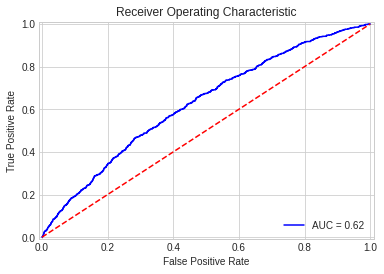

In [95]:
plot_roc_curve(y_test, probs_log_fs)

In [96]:
# K-Nearest Neighbors (KNN)
start_time = time.time()
train_pred_knn_fs, test_pred_knn_fs, acc_knn_fs, acc_cv_knn_fs, probs_knn_fs = fit_ml_algo(KNeighborsClassifier(n_neighbors = 3, n_jobs = -1),
                                                                                           X_train,
                                                                                           y_train,
                                                                                           X_test,
                                                                                           10)
knn_time_fs = (time.time() - start_time)
print("Accuracy: %s" % acc_knn_fs)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn_fs)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time_fs))

Accuracy: 69.36
Accuracy CV 10-Fold: 70.09
Running Time: 0:01:07.533922


In [97]:
# Print the confusion matrix
print(metrics.classification_report(y_train, train_pred_knn_fs))
print(metrics.classification_report(y_test, test_pred_knn_fs))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82     27985
           1       0.25      0.15      0.18      8465

    accuracy                           0.70     36450
   macro avg       0.51      0.51      0.50     36450
weighted avg       0.65      0.70      0.67     36450

              precision    recall  f1-score   support

           0       0.77      0.86      0.81      3114
           1       0.23      0.13      0.17       936

    accuracy                           0.69      4050
   macro avg       0.50      0.50      0.49      4050
weighted avg       0.64      0.69      0.66      4050



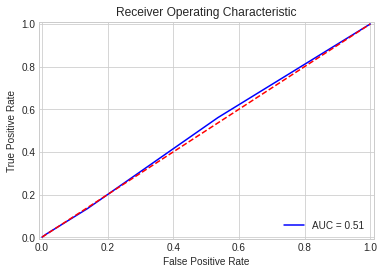

In [98]:
plot_roc_curve(y_test, probs_knn_fs)

In [99]:
# Gaussian Naive Bayes
start_time = time.time()
train_pred_gaussian_fs, test_pred_gaussian_fs, acc_gaussian_fs, acc_cv_gaussian_fs, probs_gau_fs = fit_ml_algo(GaussianNB(),
                                                                                                               X_train,
                                                                                                               y_train,
                                                                                                               X_test,
                                                                                                               10)
gaussian_time_fs = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian_fs)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian_fs)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time_fs))

Accuracy: 70.07
Accuracy CV 10-Fold: 68.95
Running Time: 0:00:01.391539


In [100]:
# Print the confusion matrix
print(metrics.classification_report(y_train, train_pred_gaussian_fs))
print(metrics.classification_report(y_test, test_pred_gaussian_fs))

              precision    recall  f1-score   support

           0       0.83      0.75      0.79     27985
           1       0.37      0.49      0.42      8465

    accuracy                           0.69     36450
   macro avg       0.60      0.62      0.61     36450
weighted avg       0.72      0.69      0.70     36450

              precision    recall  f1-score   support

           0       0.84      0.76      0.80      3114
           1       0.39      0.52      0.44       936

    accuracy                           0.70      4050
   macro avg       0.61      0.64      0.62      4050
weighted avg       0.74      0.70      0.71      4050



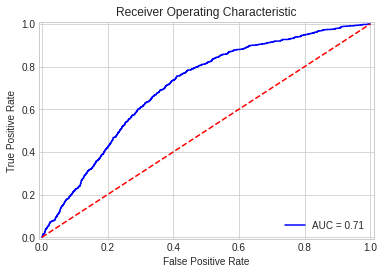

In [101]:
plot_roc_curve(y_test, probs_gau_fs)

In [102]:
# Linear Support Vector Classification (SVC)
start_time = time.time()
train_pred_svc_fs, test_pred_svc_fs, acc_linear_svc_fs, acc_cv_linear_svc_fs, _ = fit_ml_algo(LinearSVC(),
                                                                                              X_train,
                                                                                              y_train,
                                                                                              X_test,
                                                                                              10)
linear_svc_time_fs = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc_fs)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc_fs)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time_fs))

Accuracy: 76.89
Accuracy CV 10-Fold: 71.44
Running Time: 0:01:57.224712


In [103]:
# Print the confusion matrix
print(metrics.classification_report(y_train, train_pred_svc_fs))
print(metrics.classification_report(y_test, test_pred_svc_fs))

              precision    recall  f1-score   support

           0       0.77      0.90      0.83     27985
           1       0.23      0.10      0.14      8465

    accuracy                           0.71     36450
   macro avg       0.50      0.50      0.48     36450
weighted avg       0.64      0.71      0.67     36450

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      3114
           1       0.00      0.00      0.00       936

    accuracy                           0.77      4050
   macro avg       0.38      0.50      0.43      4050
weighted avg       0.59      0.77      0.67      4050



In [104]:
# Stochastic Gradient Descent
start_time = time.time()
train_pred_sgd_fs, test_pred_sgd_fs, acc_sgd_fs, acc_cv_sgd_fs, _ = fit_ml_algo(SGDClassifier(n_jobs = -1),
                                                                                X_train, 
                                                                                y_train,
                                                                                X_test,
                                                                                10)
sgd_time_fs = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd_fs)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd_fs)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time_fs))

Accuracy: 75.83
Accuracy CV 10-Fold: 66.46
Running Time: 0:00:28.092916


In [105]:
# Print the confusion matrix
print(metrics.classification_report(y_train, train_pred_sgd_fs))
print(metrics.classification_report(y_test, test_pred_sgd_fs))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78     27985
           1       0.28      0.28      0.28      8465

    accuracy                           0.66     36450
   macro avg       0.53      0.53      0.53     36450
weighted avg       0.66      0.66      0.66     36450

              precision    recall  f1-score   support

           0       0.78      0.95      0.86      3114
           1       0.41      0.11      0.17       936

    accuracy                           0.76      4050
   macro avg       0.60      0.53      0.51      4050
weighted avg       0.69      0.76      0.70      4050



In [106]:
# Decision Tree Classifier
start_time = time.time()
train_pred_dt_fs, test_pred_dt_fs, acc_dt_fs, acc_cv_dt_fs, probs_dt_fs = fit_ml_algo(DecisionTreeClassifier(),
                                                                                      X_train,
                                                                                      y_train, 
                                                                                      X_test,
                                                                                      10)
dt_time_fs = (time.time() - start_time)
print("Accuracy: %s" % acc_dt_fs)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt_fs)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time_fs))

Accuracy: 70.44
Accuracy CV 10-Fold: 69.89
Running Time: 0:00:22.698524


In [107]:
# Print the confusion matrix
print(metrics.classification_report(y_train, train_pred_dt_fs))
print(metrics.classification_report(y_test, test_pred_dt_fs))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80     27985
           1       0.36      0.38      0.37      8465

    accuracy                           0.70     36450
   macro avg       0.58      0.59      0.59     36450
weighted avg       0.71      0.70      0.70     36450

              precision    recall  f1-score   support

           0       0.81      0.80      0.81      3114
           1       0.37      0.39      0.38       936

    accuracy                           0.70      4050
   macro avg       0.59      0.59      0.59      4050
weighted avg       0.71      0.70      0.71      4050



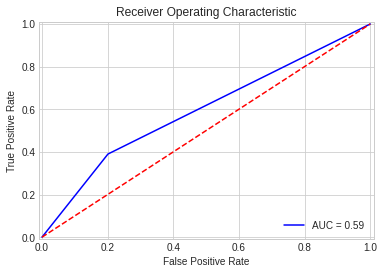

In [108]:
plot_roc_curve(y_test, probs_dt_fs)

In [109]:
# Random Forest Classifier - Random Search for Hyperparameters

# Utility function to report best scores
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            
# Specify parameters and distributions to sample from
param_dist = {"max_depth": [10, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 20),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Run Randomized Search
n_iter_search = 10
rfc = RandomForestClassifier(n_estimators=10)
random_search = RandomizedSearchCV(rfc, 
                                   n_jobs = -1, 
                                   param_distributions=param_dist, 
                                   n_iter=n_iter_search)

start = time.time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 98.18 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.789 (std: 0.003)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 10, 'min_samples_leaf': 7, 'min_samples_split': 4}

Model with rank: 2
Mean validation score: 0.779 (std: 0.002)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 7, 'min_samples_leaf': 3, 'min_samples_split': 6}

Model with rank: 3
Mean validation score: 0.778 (std: 0.005)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 6, 'min_samples_leaf': 7, 'min_samples_split': 5}

Model with rank: 4
Mean validation score: 0.778 (std: 0.003)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 6, 'min_samples_leaf': 2, 'min_samples_split': 3}

Model with rank: 5
Mean validation score: 0.776 (std: 0.005)
Parameters: {'bootstrap': False, 'criterion': 'entropy',

In [110]:
# Random Forest Classifier
start_time = time.time()
rfc = RandomForestClassifier(n_estimators=10, 
                             min_samples_leaf=2,
                             min_samples_split=17, 
                             criterion='gini', 
                             max_features=8)
train_pred_rf_fs, test_pred_rf_fs, acc_rf_fs, acc_cv_rf_fs, probs_rf_fs = fit_ml_algo(rfc,
                                                                                      X_train, 
                                                                                      y_train,
                                                                                      X_test,
                                                                                      10)
rf_time_fs = (time.time() - start_time)
print("Accuracy: %s" % acc_rf_fs)
print("Accuracy CV 10-Fold: %s" % acc_cv_rf_fs)
print("Running Time: %s" % datetime.timedelta(seconds=rf_time_fs))

Accuracy: 78.74
Accuracy CV 10-Fold: 78.21
Running Time: 0:00:26.895010


In [111]:
# Print the confusion matrix
print(metrics.classification_report(y_train, train_pred_rf_fs))
print(metrics.classification_report(y_test, test_pred_rf_fs))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87     27985
           1       0.56      0.28      0.37      8465

    accuracy                           0.78     36450
   macro avg       0.69      0.61      0.62     36450
weighted avg       0.75      0.78      0.75     36450

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      3114
           1       0.59      0.27      0.37       936

    accuracy                           0.79      4050
   macro avg       0.70      0.61      0.62      4050
weighted avg       0.76      0.79      0.76      4050



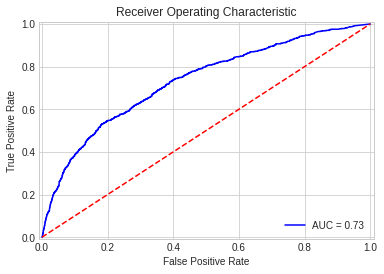

In [112]:
plot_roc_curve(y_test, probs_rf_fs)

In [113]:
# Gradient Boosting Classifier
start_time = time.time()
train_pred_gbc_fs, test_pred_gbc_fs, acc_gbc_fs, acc_cv_gbc_fs, probs_gbc_fs = fit_ml_algo(GradientBoostingClassifier(),
                                                                                           X_train,
                                                                                           y_train,
                                                                                           X_test,
                                                                                           10)
gbc_time_fs = (time.time() - start_time)
print("Accuracy: %s" % acc_gbc_fs)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbc_fs)
print("Running Time: %s" % datetime.timedelta(seconds=gbc_time_fs))

Accuracy: 80.35
Accuracy CV 10-Fold: 80.18
Running Time: 0:04:40.858722


In [114]:
# Print the confusion matrix
print(metrics.classification_report(y_train, train_pred_gbc_fs))
print(metrics.classification_report(y_test, test_pred_gbc_fs))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88     27985
           1       0.64      0.34      0.44      8465

    accuracy                           0.80     36450
   macro avg       0.73      0.64      0.66     36450
weighted avg       0.78      0.80      0.78     36450

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      3114
           1       0.64      0.34      0.44       936

    accuracy                           0.80      4050
   macro avg       0.73      0.64      0.66      4050
weighted avg       0.78      0.80      0.78      4050



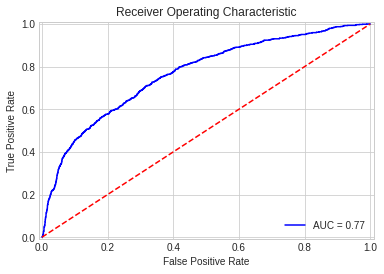

In [115]:
plot_roc_curve(y_test, probs_gbc_fs)

In [116]:
# XGBoost Classifier
start_time = time.time()
train_pred_xgb_fs, test_pred_xgb_fs, acc_xgb_fs, acc_cv_xgb_fs, probs_xgb_fs = fit_ml_algo(XGBClassifier(), 
                                                                                           X_train, 
                                                                                           y_train, 
                                                                                           X_test, 
                                                                                           10)
xgb_time_fs = (time.time() - start_time)
print("Accuracy: %s" % acc_xgb_fs)
print("Accuracy CV 10-Fold: %s" % acc_cv_xgb_fs)
print("Running Time: %s" % datetime.timedelta(seconds=xgb_time_fs))

Accuracy: 80.59
Accuracy CV 10-Fold: 80.21
Running Time: 0:00:54.402008


In [117]:
# Print the confusion matrix
print(metrics.classification_report(y_train, train_pred_xgb_fs))
print(metrics.classification_report(y_test, test_pred_xgb_fs))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88     27985
           1       0.64      0.34      0.45      8465

    accuracy                           0.80     36450
   macro avg       0.73      0.64      0.66     36450
weighted avg       0.78      0.80      0.78     36450

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      3114
           1       0.65      0.35      0.46       936

    accuracy                           0.81      4050
   macro avg       0.74      0.65      0.67      4050
weighted avg       0.79      0.81      0.78      4050



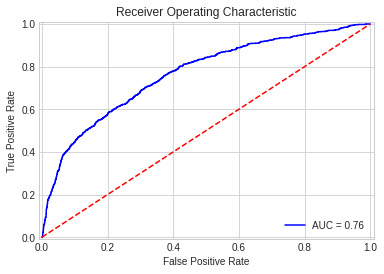

In [118]:
plot_roc_curve(y_test, probs_xgb_fs)

### Part O: Machine Learning - Model Evaluation_fs

In [119]:
# Compare all the models with their respective accuracy scores
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Descent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Classifier',
              'XGBoost Classifier'],
    'Accuracy Score': [
        acc_knn_fs, 
        acc_log_fs, 
        acc_rf_fs, 
        acc_gaussian_fs, 
        acc_sgd_fs, 
        acc_linear_svc_fs, 
        acc_dt_fs,
        acc_gbc_fs,
        acc_xgb_fs
    ]})
models.sort_values(by='Accuracy Score', ascending=False)

,Model,Accuracy Score
8,XGBoost Classifier,80.59
7,Gradient Boosting Classifier,80.35
2,Random Forest,78.74
5,Linear SVC,76.89
1,Logistic Regression,76.81
4,Stochastic Gradient Descent,75.83
6,Decision Tree,70.44
3,Naive Bayes,70.07
0,KNN,69.36


In [120]:
# Compare all the models with their respective accuracy scores using 10-CV
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Descent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Classifier',
              'XGBoost Classifier'],
    'Accuracy Score (10-CV)': [
        acc_cv_knn_fs, 
        acc_cv_log_fs,     
        acc_cv_rf_fs, 
        acc_cv_gaussian_fs, 
        acc_cv_sgd_fs, 
        acc_cv_linear_svc_fs, 
        acc_cv_dt_fs,
        acc_cv_gbc_fs,
        acc_cv_xgb_fs
    ]})
models.sort_values(by='Accuracy Score (10-CV)', ascending=False)

,Model,Accuracy Score (10-CV)
8,XGBoost Classifier,80.21
7,Gradient Boosting Classifier,80.18
2,Random Forest,78.21
1,Logistic Regression,76.78
5,Linear SVC,71.44
0,KNN,70.09
6,Decision Tree,69.89
3,Naive Bayes,68.95
4,Stochastic Gradient Descent,66.46


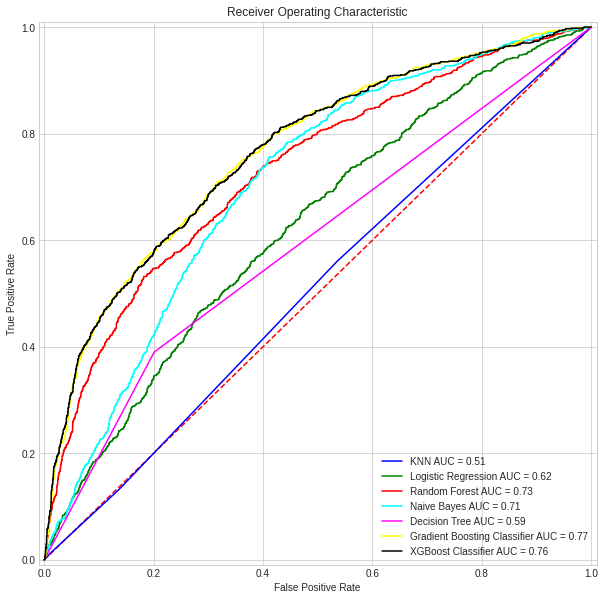

In [121]:
# Plot all the models to compare their ROC
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(10,10)) 

models = [
    'KNN', 
    'Logistic Regression', 
    'Random Forest', 
    'Naive Bayes', 
    'Decision Tree', 
    'Gradient Boosting Classifier',
    'XGBoost Classifier'
]

probs = [
    probs_knn_fs,
    probs_log_fs,
    probs_rf_fs,
    probs_gau_fs,
    probs_dt_fs,
    probs_gbc_fs,
    probs_xgb_fs
]

colors = [
    'blue',
    'green',
    'red',
    'cyan',
    'magenta',
    'yellow',
    'black'
]
    
plt.title('Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

def plot_roc_curves(y_test, prob, model):
    fpr, tpr, threshold = metrics.roc_curve(y_test, prob)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, 'b', label = model + ' AUC = %0.2f' % roc_auc, color=colors[i])
    plt.legend(loc = 'lower right')
    
for i, model in list(enumerate(models)):
    plot_roc_curves(y_test, probs[i], models[i])
    
plt.show()

### Part P: Preparing the test set for prediction_fs

In [122]:
# We have cleaned the df_test data once before in CASE I so it won't change and can be used again here.

In [123]:
# To train on 100% of training data
train_data = df_rfecv.drop ('fail_7', axis=1)
target = df_rfecv['fail_7']

In [124]:
train_data.shape

(40500, 35)

### Part Q: Predicting the 'fail_7' for test.csv_fs

In [125]:
# Picking XGBoost Classifier because that was out best fit ML ago from results above when using feature selection
# Even though the accuracy of one-pass is slightly higher than 10-cv we will still go ahead with 10-cv

# Declare parameters
params = {
    'objective':'binary:logistic',
    'max_depth': 4,
    'gamma': 0.5,
    'learning_rate': 0.01,
    }   


# Instantiate the classifier 
xgb_clf_fs = XGBClassifier(**params)

In [126]:
scoring = 'accuracy'
score = cross_val_score(xgb_clf_fs, train_data, target, cv=10, n_jobs=-1, scoring=scoring)

In [127]:
scoreP = round(np.mean(score)*100, 2)
print('Our XGBoosting Classifier score for entire training dataset (with feature selection) is ' + str(scoreP) + '%')

Our XGBoosting Classifier score for entire training dataset (with feature selection) is 80.0%


In [128]:
# Picking the same features from test dataset which were returned in our feature selection earlier
df_test_fs = df_test[df_test.columns[selector.support_]]

In [129]:
df_test_fs.shape

(4500, 35)

In [130]:
df_test_fs.head()

,avg_time_charging_lag1,avg_time_charging_lag2,avg_time_charging_lag3,avg_time_charging_lag7,avg_time_discharging_lag2,discharging_rate_lag3,charge_cycle_time_below_12,avg_time_discharging_lag4,avg_time_charging_lag5,avg_time_discharging_lag5,avg_time_charging_lag6,avg_time_discharging_lag6,avg_time_charging_lag8,avg_time_discharging_lag8,avg_time_charging_lag9,avg_time_discharging_lag9,avg_time_charging_lag10,avg_time_discharging_lag10,avg_time_charging_lag11,avg_time_discharging_lag11,avg_time_charging_lag12,avg_time_discharging_lag12,avg_time_charging_lag13,avg_time_discharging_lag13,avg_time_charging_lag14,avg_time_discharging_lag14,chargecycles,dischargecycles,number_times_restart,avg_volt_change_charging,avg_volt_change_discharging,avg_time_charging,avg_time_discharging,max_voltage_day,cycle_time
0,35.56,4.31,5.07,4.60,3.77,-0.240000,True,4.10,5.11,4.31,4.66,3.67,6.33,5.78,5.91,4.94,5.06,3.37,31.21,45.77,46.03,72.74,33.74,57.85,20.67,28.73,77.96000,77.680000,3.640000,346.301200,345.379600,17.481600,27.721600,4159.000000,45.203200
1,31.26,4.76,27.40,29.60,3.63,-0.670000,False,4.10,37.44,71.56,5.07,4.64,4.70,3.67,21.24,38.26,5.25,4.59,5.31,4.27,4.47,4.07,4.71,17.73,5.35,5.51,81.26087,81.260870,2.826087,356.218261,357.305652,17.479130,27.650435,4163.608696,45.129565
2,30.08,5.07,4.76,4.74,5.16,0.000000,True,5.04,13.50,21.91,4.48,4.20,5.02,4.14,4.77,3.48,5.18,5.80,29.12,48.01,43.60,80.25,4.82,3.96,5.21,4.37,109.20000,109.133333,1.266667,368.532667,366.844667,11.361333,16.739333,4176.133333,28.100667
3,33.31,32.79,5.09,4.96,68.54,0.003333,True,3.92,5.10,5.81,35.69,56.90,4.91,4.22,5.05,4.75,35.47,58.31,29.44,42.88,50.04,88.48,4.88,3.62,4.52,4.01,90.87500,91.000000,0.937500,352.899375,352.595000,17.168750,27.460625,4159.875000,44.629375
4,4.44,30.03,5.57,5.02,54.80,-4.483333,False,3.43,6.07,5.04,45.39,77.12,26.64,54.73,35.01,54.38,4.94,3.38,5.84,4.61,4.87,3.36,31.75,59.88,25.98,41.24,81.56000,81.480000,1.200000,363.912800,365.208400,14.860000,23.980800,4168.400000,38.840800


In [132]:
# Predict the class for test data on whether the 4500 new devices will fail in next 7 weeks or not
xgb_clf_fs.fit(train_data, target)

prediction = xgb_clf_fs.predict(df_test_fs)

In [133]:
category_pred_fail_7_xgb_fs = pd.DataFrame({
    'deviceid': df_test['deviceid'],
    'fail_7': prediction
})

In [134]:
category_pred_fail_7_xgb_fs.head(10)

,deviceid,fail_7
0,42979,1
1,14911,0
2,48386,0
3,18822,0
4,49810,0
5,23495,0
6,30555,1
7,18316,0
8,17929,0
9,33374,1


In [135]:
# The result can be saved in csv with the following code:
# NOTE: If using Google Colab like here then the results will be saved locally here under '/contents'
category_pred_fail_7_xgb_fs.to_csv('pb_challenge_prediction_xgb_fs.csv', index=False)